# Business Case: Delhivery - Feature Engineering 
## **About Delhivery**

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


## **Business Problem Statement**


- The company wants to understand and process the data coming out of data engineering pipelines:

>• Clean, sanitize and manipulate data to get useful features out of raw fields

>• Make sense out of the raw data and help the data science team to build forecasting models on it.


### **Column Profiling**

- data :  tells whether the data is testing or training data


- trip_creation_time : Timestamp of trip creation
- route_schedule_uuid : Unique Id for a particular route schedule
- route_type : Transportation type 
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
    
- trip_uuid : Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center : Source ID of trip origin
- source_name : Source Name of trip origin
- destination_cente : Destination ID
- destination_name : Destination Name
- od_start_time : Trip start time
- od_end_time : Trip end time
- start_scan_to_end_scan : Time taken to deliver from source to destination
- is_cutoff : Unknown field
- cutoff_factor : Unknown field
- cutoff_timestamp : Unknown field
- actual_distance_to_destination : Distance in Kms between source and destination warehouse
- actual_time : Actual time taken to complete the delivery (Cumulative)
- osrm_time : An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance : An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor : Unknown field
- segment_actual_time : This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time : This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance : This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor : Unknown field


- #### In-depth analysis and feature engineering to be done : 
    
    > - time taken between od_start_time and od_end_time 
    
    > - hypothesis testing/ Visual analysis : population mean of start_scan_to_end_scan & time taken between od_start_time and od_end_time
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and OSRM time aggregated value 
            
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and segment actual time 
            
    > - hypothesis testing/ visual analysis : 
            - osrm distance aggregated value and segment osrm distance 
            
    > - hypothesis testing/ visual analysis :
            - osrm time aggregated value and segment osrm time aggregated value
            
            
    > - outliers in the numerical variables 
    
    > - outliers using the IQR method.
    
    > - one-hot encoding of categorical variables (like route_type)
    
    > - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import plotly.express as px
import missingno as msno

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [ ]:
df.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


# 1 Understanding shape and structure of data : 

In [ ]:
# Number of rows amd columns in dataset
print(f"# Number of Rows: {df.shape[0]} \n# Number of Columns: {df.shape[1]}")

# Number of Rows: 144867 
# Number of Columns: 24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

**Insights**  
Features : source_name and destination_name having few missing values

## 1.1 Changing data type for data and time related features : 


In [ ]:
categorical_types = ['category']

In [ ]:
for column in ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']:
    df[column] = pd.to_datetime(df[column])
for column in ['data', 'route_type']:
    df[column] = pd.Categorical(df[column])

## 1.2 Missing Data

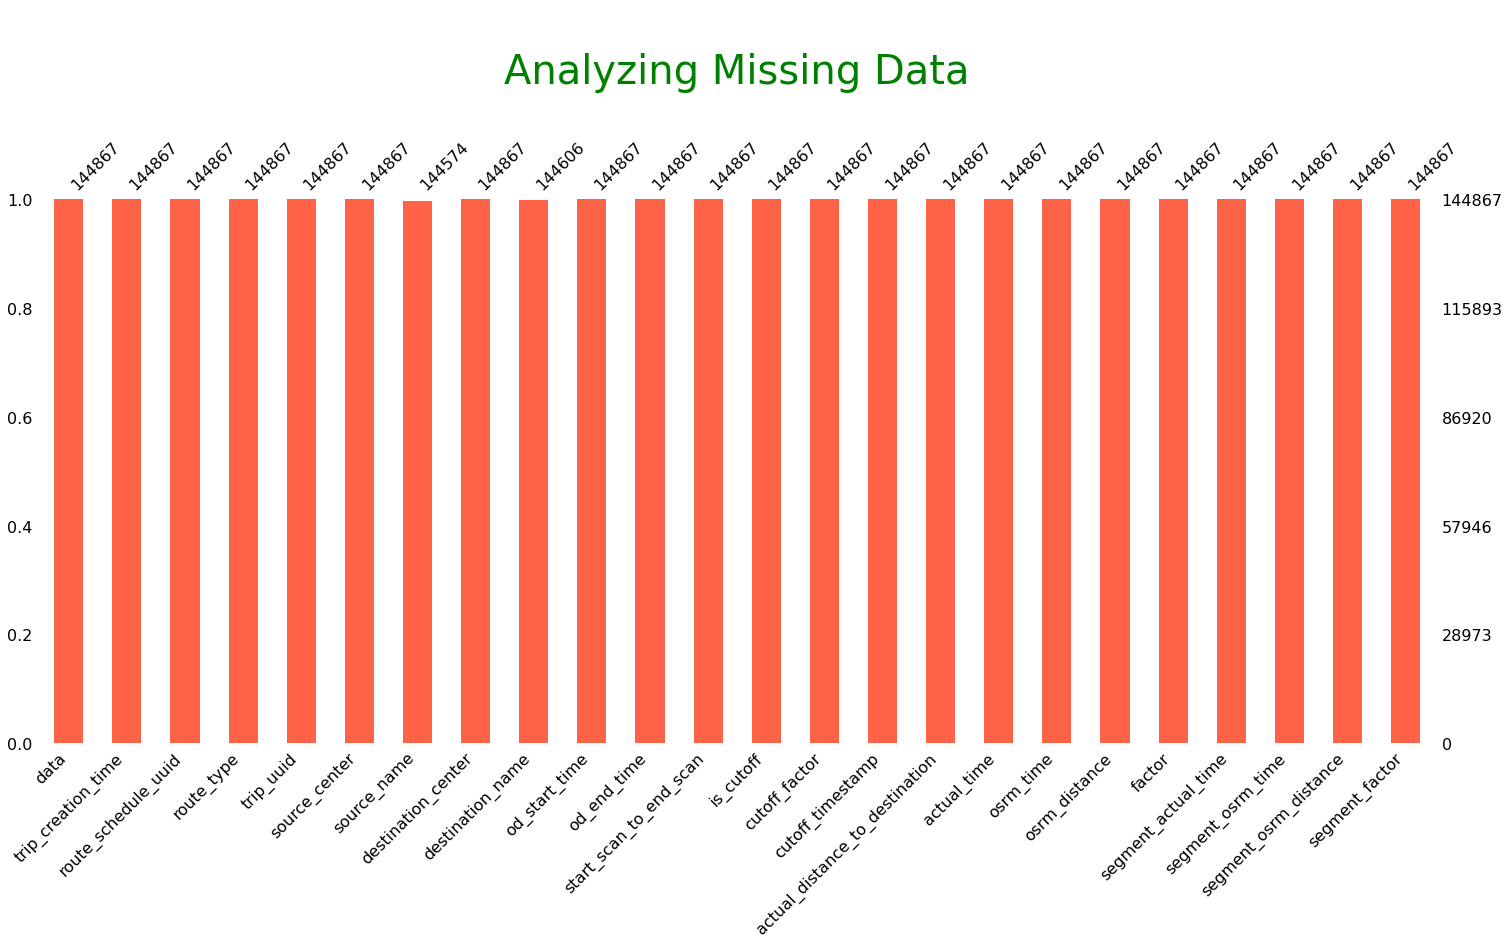

In [ ]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

## 1.3 Processing NaN value

In [ ]:
df['source_name'] = df['source_name'].replace(np.nan, 'Unknown')
df['destination_name'] = df['destination_name'].replace(np.nan, 'Unknown')

## 1.4 Extracting Trip Creation Informations from Trip Creation time

In [ ]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [ ]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

**Insights** 

*Delivery* trip data is given from September and October 2018.

In [ ]:
df["trip_creation_day"] = (df["trip_creation_time"].dt.day_name())
df["trip_creation_month"] = (df["trip_creation_time"].dt.month_name())
df["trip_creation_year"] = (df["trip_creation_time"].dt.year)
df['trip_creation_hour'] = (df['trip_creation_time'].dt.hour)

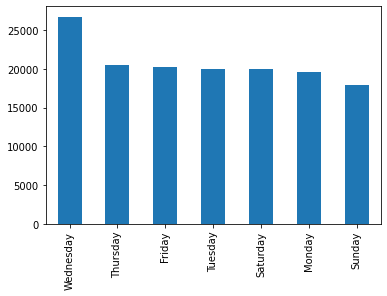

In [ ]:
df["trip_creation_day"].value_counts().plot(kind = "bar")
plt.show()

**Insights**  
Wednesday seems to have relatively higher count

In [ ]:

df["trip_creation_day"].value_counts(normalize=True)*100

Wednesday    18.452788
Thursday     14.137795
Friday       13.972816
Tuesday      13.778845
Saturday     13.761588
Monday       13.560714
Sunday       12.335453
Name: trip_creation_day, dtype: float64

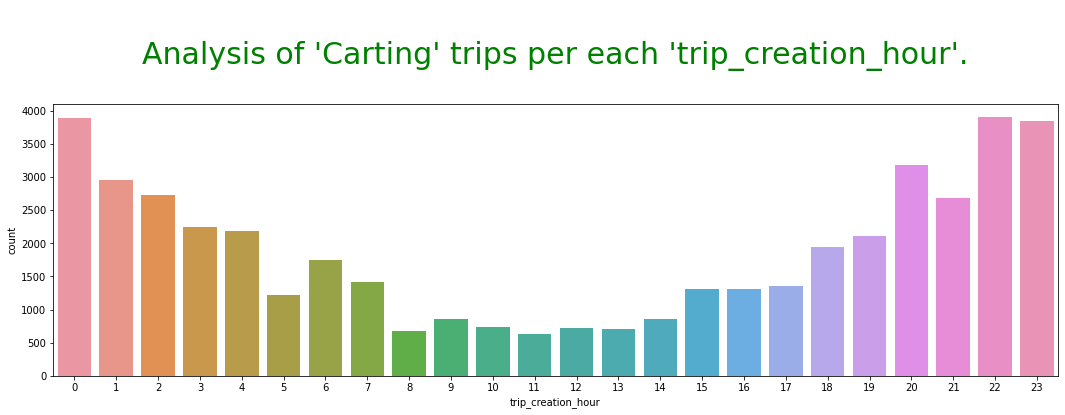

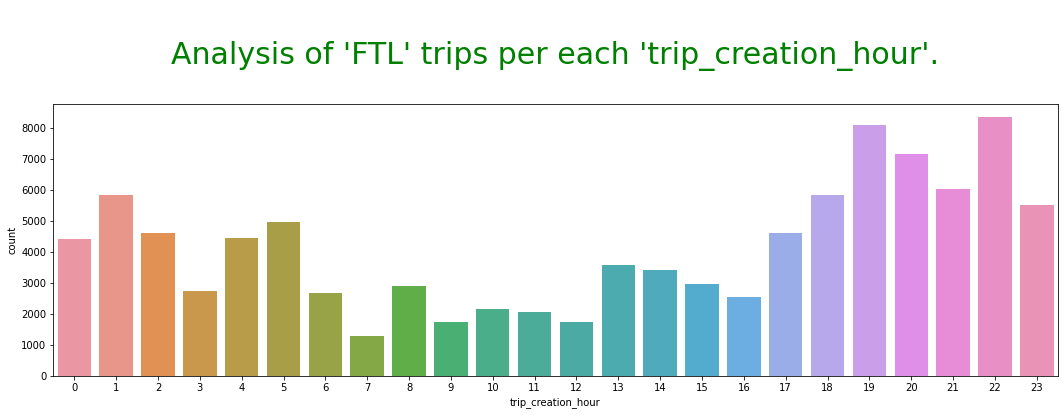

In [ ]:
fig, axes = plt.subplots(figsize=(18,5))
sns.countplot(data=df[df['route_type']=='Carting'], x='trip_creation_hour')
plt.title(f"\nAnalysis of 'Carting' trips per each 'trip_creation_hour'.\n", fontsize=30, color="green")
plt.show()
fig, axes = plt.subplots(figsize=(18,5))
sns.countplot(data=df[df['route_type']=='FTL'], x='trip_creation_hour')
plt.title(f"\nAnalysis of 'FTL' trips per each 'trip_creation_hour'.\n", fontsize=30, color="green")
plt.show()

## 1.5 Understanding the structure

---



In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
trip_creation_da

**Insights**
- We have `14817 different trips happended between source to destinations.` 
- Total of ` 1504 delivery routes` we have.
    - 1508 unique source centers 
    - 1481 unique destination centres 

### 1.5.1 There are two different kind of routes are there : 

In [ ]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [ ]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

In [ ]:
routeType_plot= (df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100)
routeType_plot

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

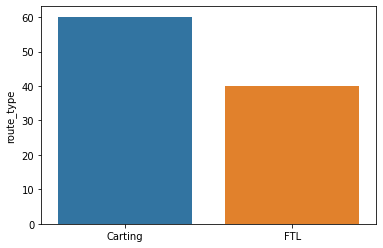

In [ ]:
sns.barplot(x= routeType_plot.index,
           y = routeType_plot)

plt.show()

**Insights**

- From `14817 total different trips` , we have 
     - 8908 `(60%)` of the trip-routes are `Carting` , which consists of small vehicles 
     - 5909 `(40%)` of total trip-routes are `FTL` : which are Full Truck Load get to the destination sooner.  as no otther pickups  or drop offs along the way

# 2 Undestanding Features and Feature Engineering




## 2.1 Analyzing records for one particular trip id

In [ ]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,September,2018,2
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,September,2018,2
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,September,2018,2
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,September,2018,2
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,September,2018,2
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58.000000,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Thursday,September,2018,2
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29.000000,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Thursday,September,2018,2
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58.000000,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Thursday,September,2018,2
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56.000000,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Thursday,September,2018,2
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa

**Observations**
    From the above mentioned particular trip record, trip is segmented between different drop locations.

    We can observe the following:
    - Trip is taking stops between mentioned source and destination centers(warehouses).
    - od-end-tiem and od-start-time are the time when the that particular trip was ended and started .

    - start-scan-to-end-scan is the time duration of trips are being scanned when start and end. 
    - start-scan-to-end-scan time is given cummulative. which is not given per trip segments
    - trip cut off False ,shows the record of trip when trip changes from one warehouse to another. between source to destination. 
    - Actual-time given is the time to complete the entire delivery from source to destination (given cumulatively )
    - osrm -time is an open rourse routing engine time calculator which computes the shortest path between points in a given map and gives the time and osrm distance gives the shortest distance (given cumulatively )
    - Actual-distnace-to-destination is the actual distance between warehouses , given cummulative during the trip . 
    - Every time cutoff is False , distance count starts from begining. 
    - Segmment actual time,  is the actual time taken between two stops in between trips. given per each segment (taken between subset of package delivery)
    - Segment osrm time is the osrm segment time , taken between subset of package delivery




## 2.2 Extracting Features like city - place - code -state from source and destination name columns

In [ ]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [ ]:
df["source_place"] = df["source_name"].str.split("_",n=2,expand=True)[1]
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand=True)[1]



In [ ]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND1310


## 2.3 Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan : 

In [ ]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

#### Converting given time duration features into hours . 
    start_scan_to_end_scan
    actual_time
    osrm_time
    segment_actual_time
    segment_osrm_time
    

In [ ]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60


In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57.000000,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55.000000,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,45,2018-09-20 21:57:20.000000,45.258278,1.566667,1.000000,67.9280,1.566667,0.200000,0.200000,8.1858,1.000000,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,54,2018-09-20 21:31:18.000000,54.092531,2.000000,1.266667,85.6829,1.578947,0.433333,0.350000,17.3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  category      
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  category      
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144867 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144867 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [ ]:
df.isna().sum()

data                                     0
trip_creation_time                       0
route_schedule_uuid                      0
route_type                               0
trip_uuid                                0
source_center                            0
source_name                              0
destination_center                       0
destination_name                         0
od_start_time                            0
od_end_time                              0
start_scan_to_end_scan                   0
is_cutoff                                0
cutoff_factor                            0
cutoff_timestamp                         0
actual_distance_to_destination           0
actual_time                              0
osrm_time                                0
osrm_distance                            0
factor                                   0
segment_actual_time                      0
segment_osrm_time                        0
segment_osrm_distance                    0
segment_fac

In [ ]:
df.shape

(144867, 37)

# 3 Data cleaning : 

In [ ]:
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

In [ ]:
df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [ ]:
df["destination_city"].replace({
    "del":"Delhi"
},inplace=True)
df["source_city"].replace({
    "del":"Delhi"
},inplace=True)

In [ ]:
df["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)


In [ ]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [ ]:
df["source_city_state"].nunique()

1249

In [ ]:
df["destination_city_state"].nunique()

1242

In [ ]:
df["source_state"].nunique()

33

In [ ]:
df["destination_state"].nunique()

32

**Observations**  
Delhivery has delivered in approximately 1250 cities and almost all the states all over in India

In [ ]:
data = df.copy()

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'trip_creation_hour', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [ ]:
# data[["source_city","source_state","destination_city","destination_state","source_city_state","destination_city_state"]].fillna()

In [ ]:
# above data we impute after aggregating as per tripIDs. 

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'trip_creation_hour', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [ ]:
data.drop(['source_center',"source_name","destination_center","destination_name","cutoff_timestamp"],axis = 1,inplace=True)

In [ ]:
data.drop(["od_end_time","od_start_time"],axis = 1 , inplace=True)

In [ ]:
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,9,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,18,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,27,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,36,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,False,39,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,September,2018,2,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,45,45.258278,1.566667,1.000000,67.9280,1.566667,0.200000,0.200000,8.1858,1.000000,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,54,54.092531,2.000000,1.266667,85.6829,1.578947,0.433333,0.350000,17.3725,1.238095,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,63,66.163591,2.333333,1.466667,97.0933,1.590909,0.333333,0.566667,20.7053,0.588235,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,72,73.680667,2.633333,1.633333,111.2709,1.612245,0.283333,0.450000,18.8885,0.629630,Thursday,September,2018,16,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana


# 4 Outlier Detection & Treatment

In [ ]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_year,trip_creation_hour,time_taken_btwn_odstart_and_od_end
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000,144867.0,144867.000000,144867.000000
mean,16.021050,232.926567,234.073372,6.948792,3.564471,284.771297,2.120107,0.603269,0.308459,22.82902,2.218368,2018.0,12.652516,16.029317
std,17.283546,344.755577,344.990009,9.968394,5.133518,421.119294,1.715421,0.892853,0.246266,17.86066,4.847530,0.0,7.949513,17.283544
min,0.333333,9.000000,9.000045,0.150000,0.100000,9.008200,0.144000,-4.066667,0.000000,0.00000,-23.444444,2018.0,0.000000,0.345047
25%,2.683333,22.000000,23.355874,0.850000,0.450000,29.914700,1.604264,0.333333,0.183333,12.07010,1.347826,2018.0,5.000000,2.691688
50%,7.483333,66.000000,66.126571,2.200000,1.066667,78.525800,1.857143,0.483333,0.283333,23.51300,1.684211,2018.0,15.000000,7.487276
75%,27.233333,286.000000,286.708875,8.550000,4.283333,343.193250,2.213483,0.666667,0.366667,27.81325,2.250000,2018.0,20.000000,27.249169
max,131.633333,1927.000000,1927.447705,75.533333,28.100000,2326.199100,77.387097,50.850000,26.850000,2191.40370,574.250000,2018.0,23.000000,131.642533


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_fraction = (len(df_in)-len(df_out))/len(df_in)
    fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,6))
    sns.boxplot(data=df_in, y=col_name)
    if outlier_fraction <= 0.10:
        fig.suptitle(f"Outliers constitute {round(outlier_fraction*100, 2)}% of data for column '{col_name}'. Hence removing outliers.", fontsize=20, color="green")
        plt.show()
        return df_out
    else:
        fig.suptitle(f"Outliers constitute significant amount of data ({round(outlier_fraction*100, 2)}%) for column '{col_name}'. Hence not removing outliers..", fontsize=20, color="green")
        plt.show()
        return df_in

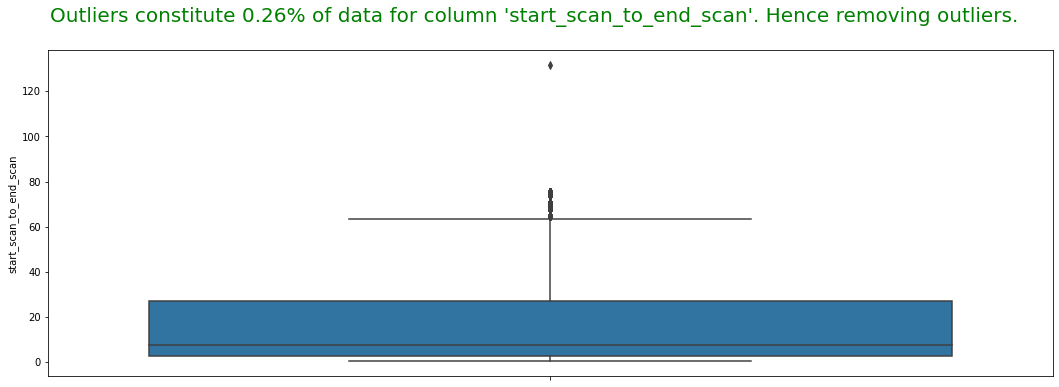

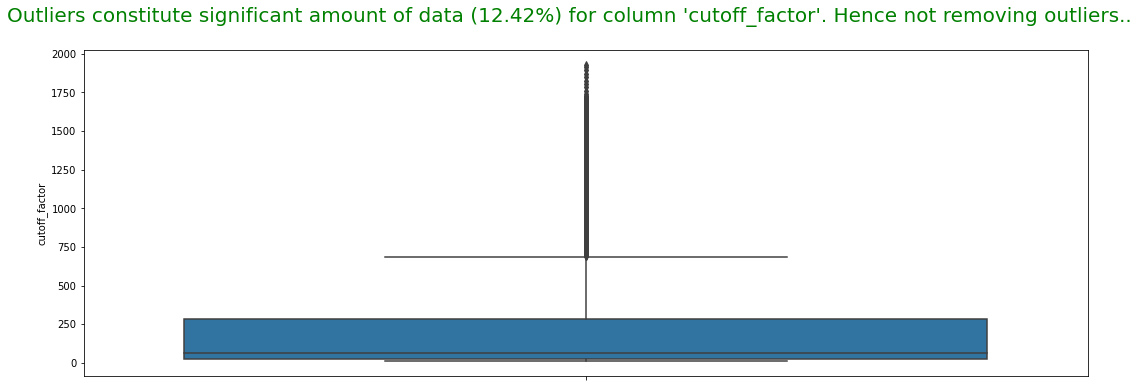

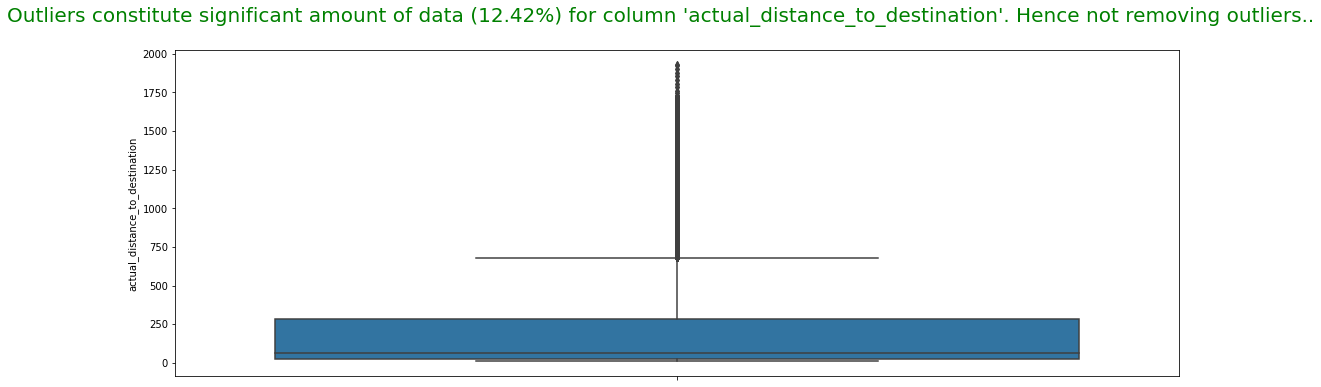

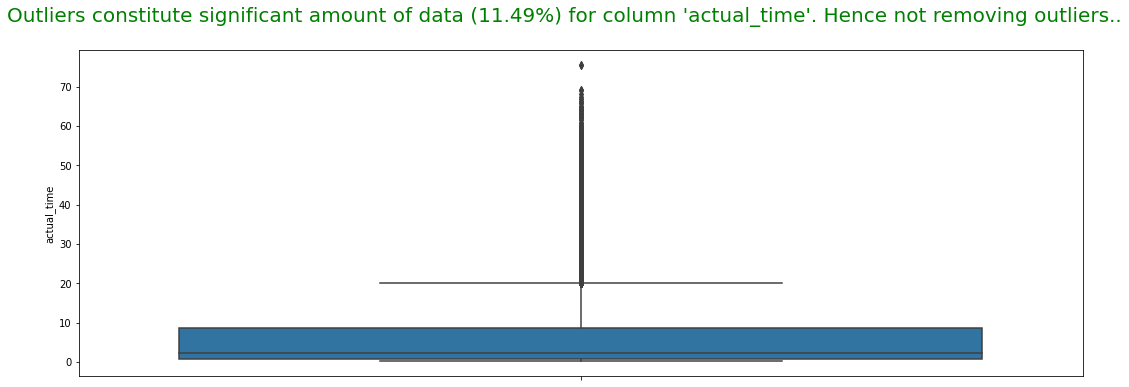

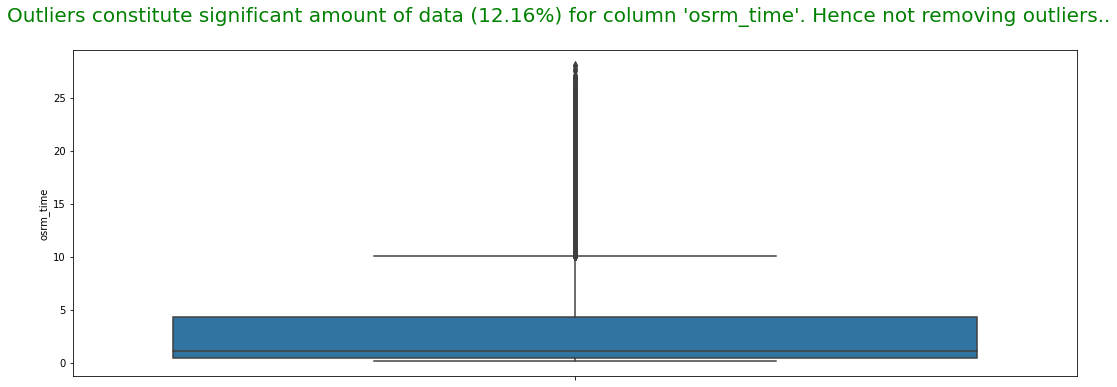

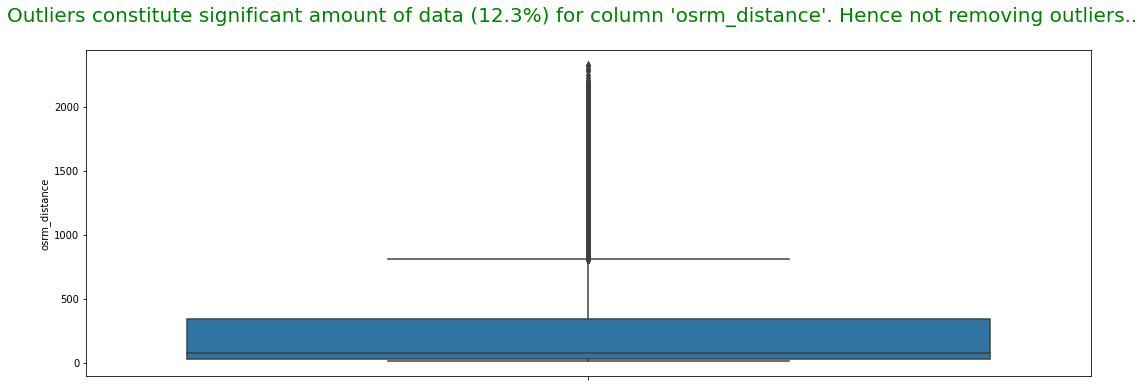

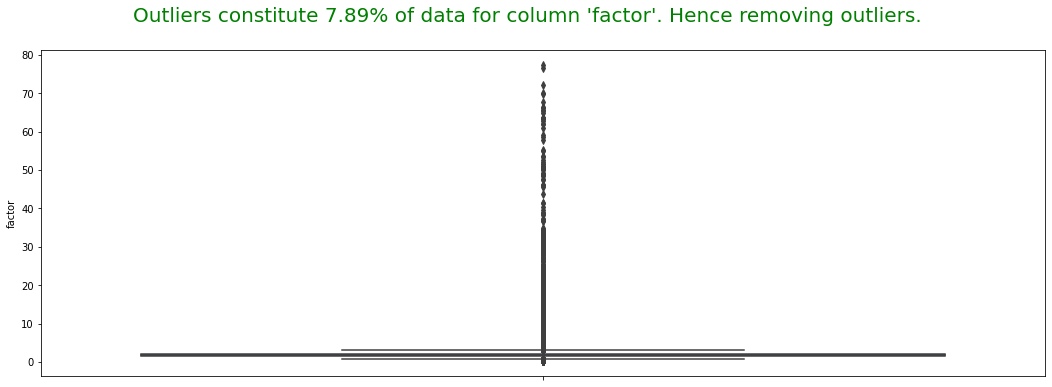

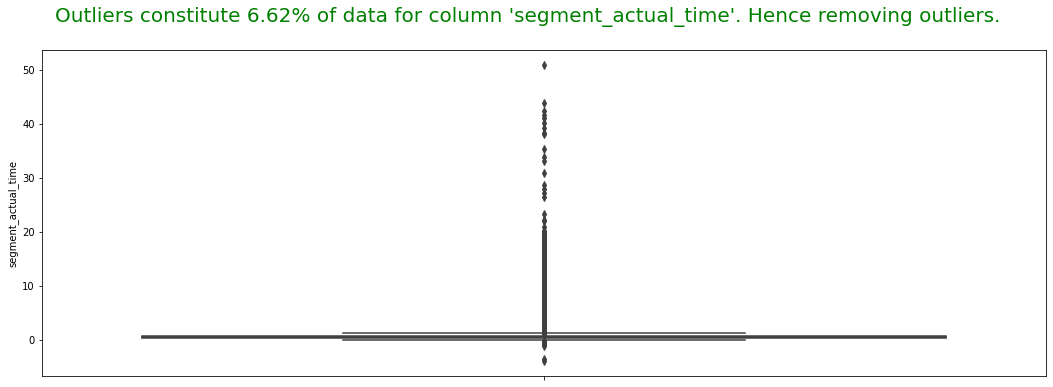

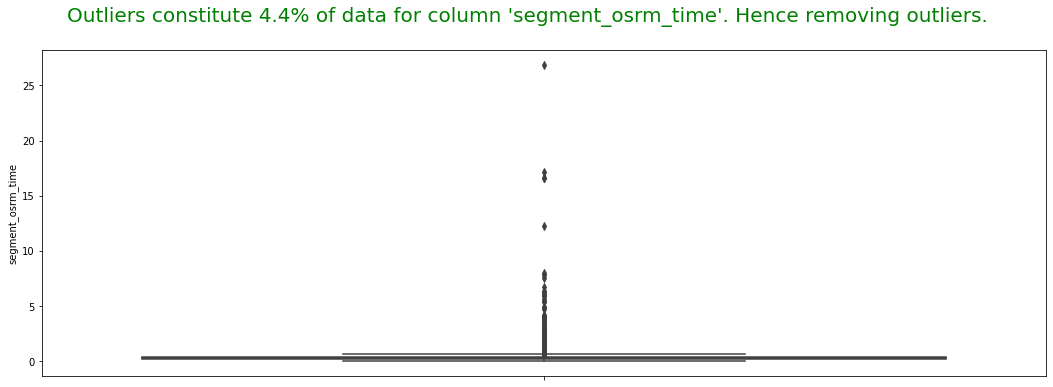

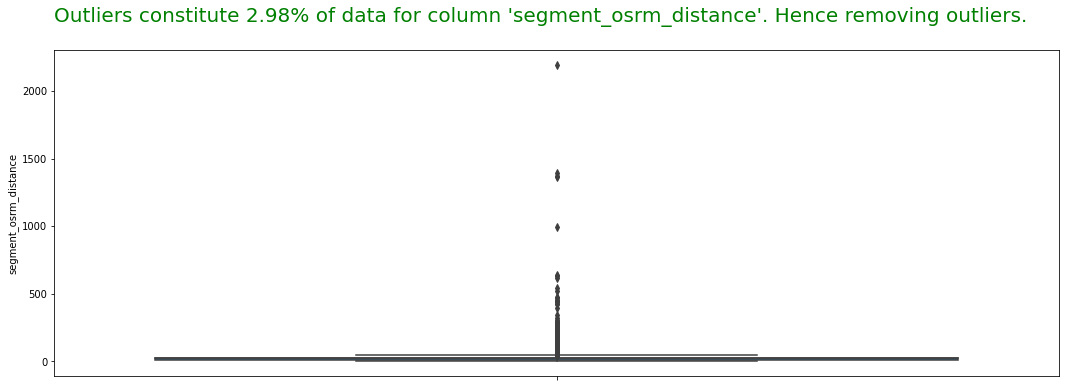

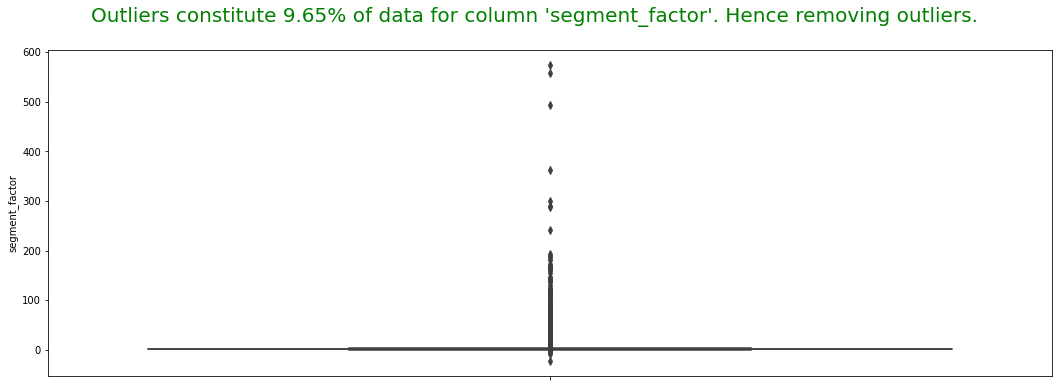

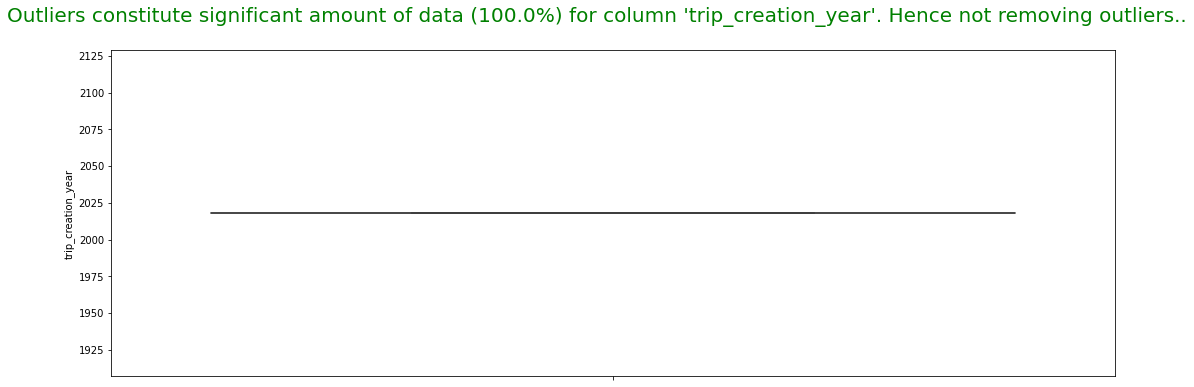

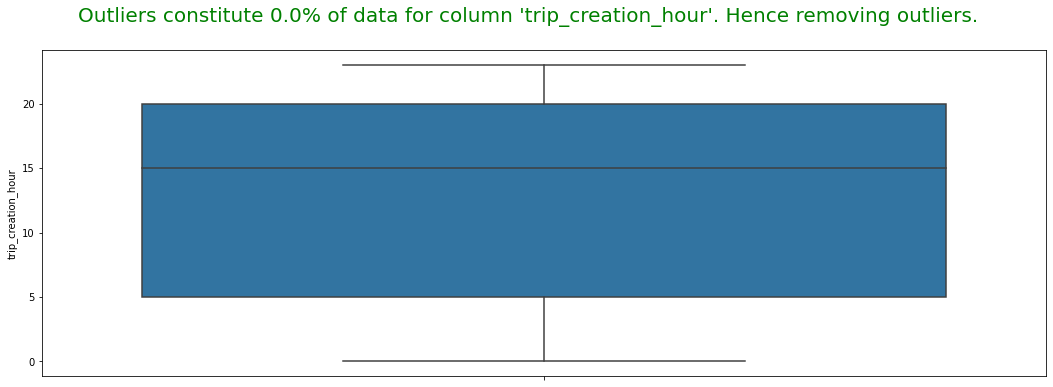

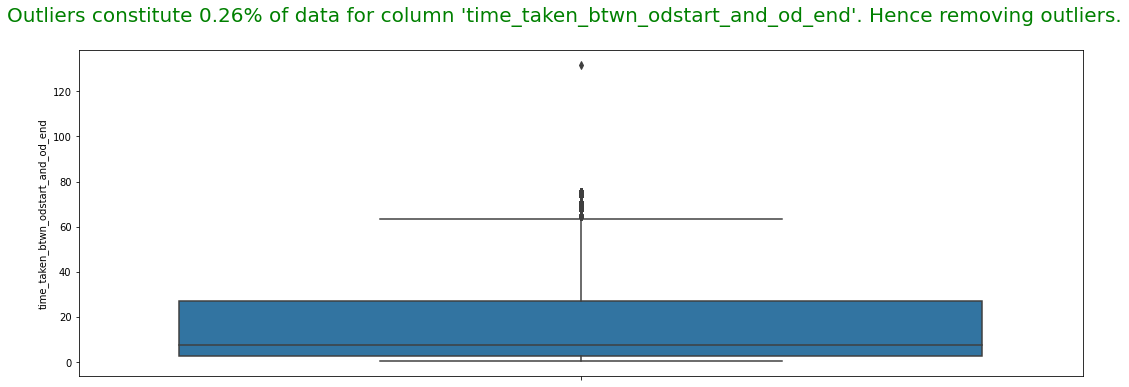

In [ ]:
numeric_types = ['int64', 'float64']
get_columns_by_types = lambda data, types: [data.columns[index] for index in range(len(data.columns)) if data.dtypes[index].name in types]
for column in get_columns_by_types(data, numeric_types):
    df = remove_outlier(data, column)

# 5 Aggregating Data

In [ ]:
actual_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
osrm_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()

time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 

osrm_distance = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()
actual_distance_to_destination = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
segment_osrm_distance = data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()


****

# 6 Univariate and Bivariate Analysis


## 6.1 Univariate Analysis 


### 6.1.1 Univariate Analysis for Categorical Data

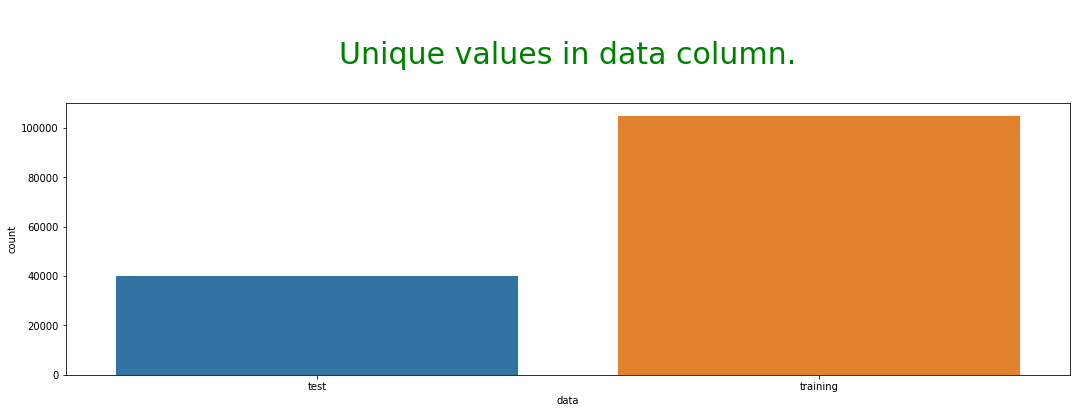

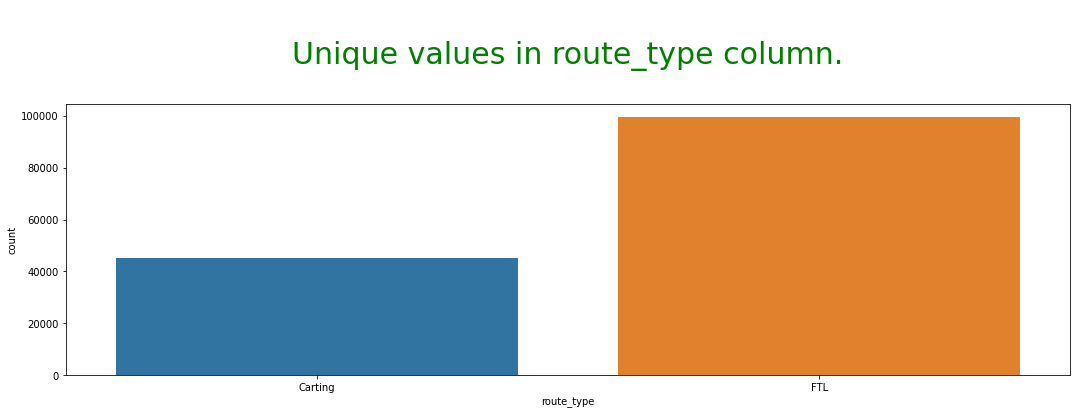

In [ ]:
categorical_types = ['category']
for column in get_columns_by_types(data, categorical_types):
    fig, axes = plt.subplots(figsize=(18,5))
    sns.countplot(data=data, x=column)
    plt.title(f"\nUnique values in {column} column.\n", fontsize=30, color="green")
    plt.show()

### 6.1.2 Univariate Analysis for Continuous Data

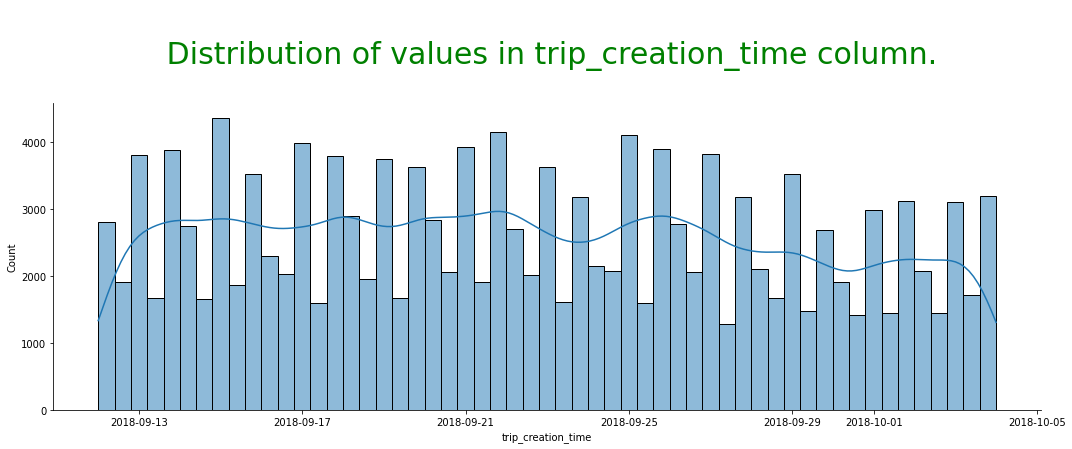

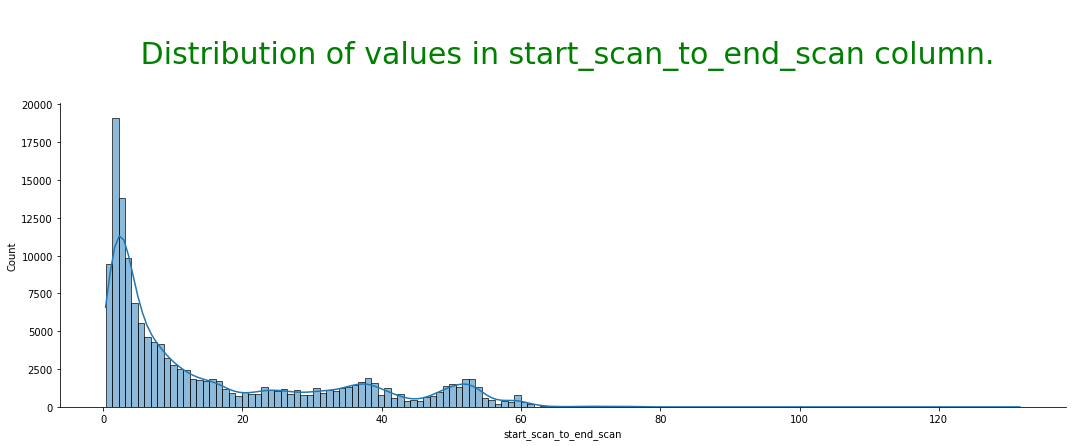

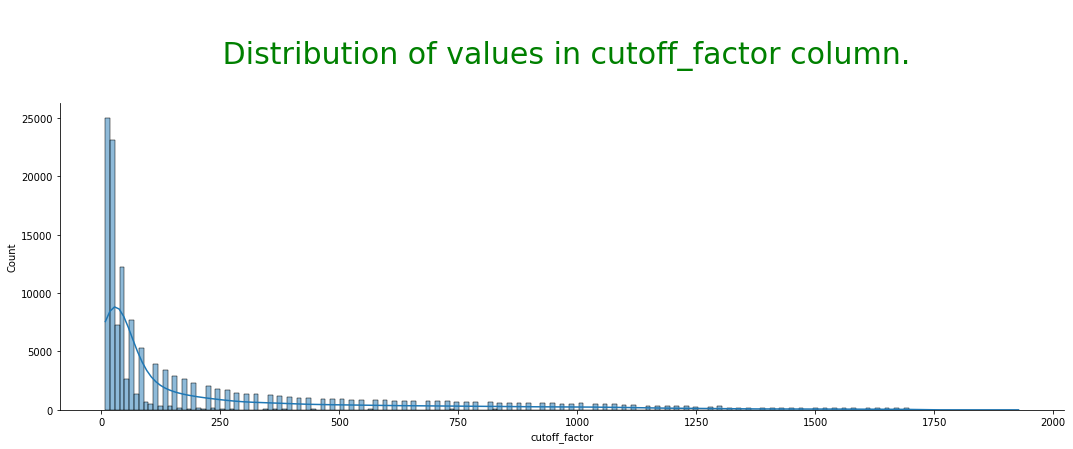

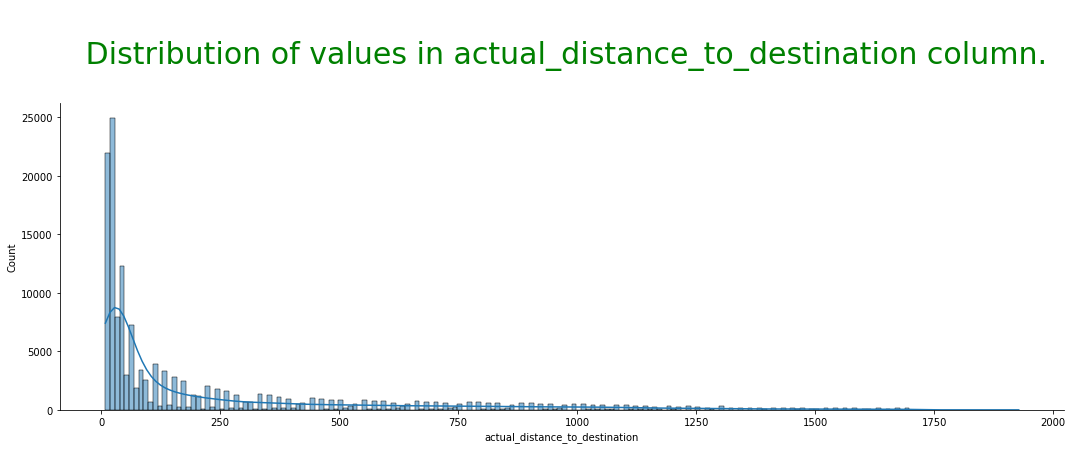

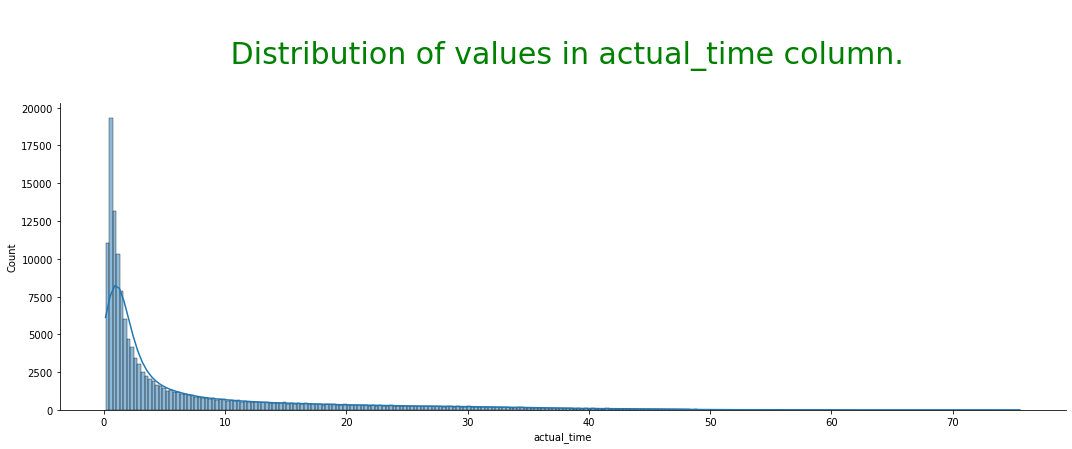

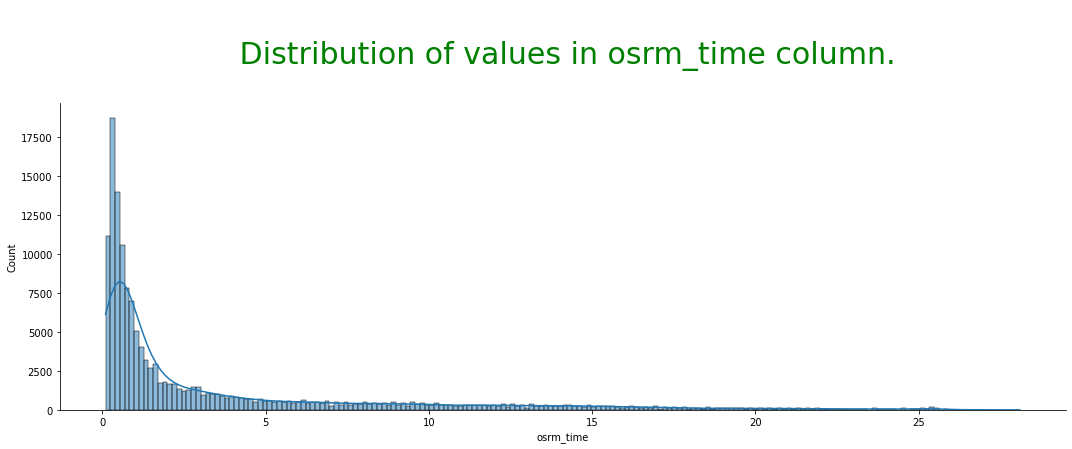

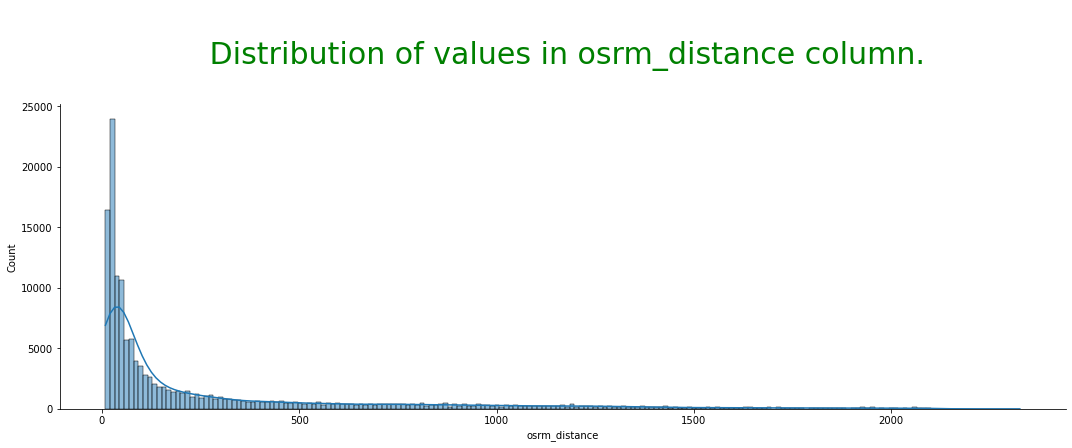

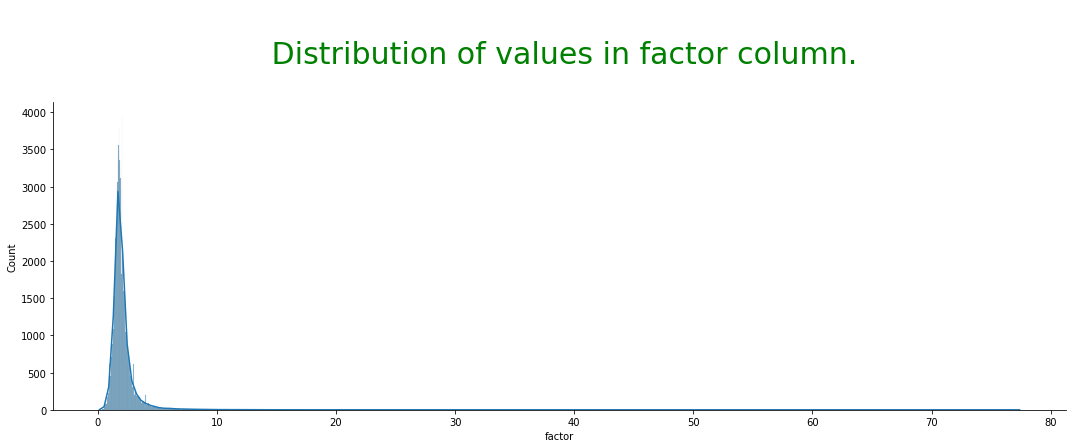

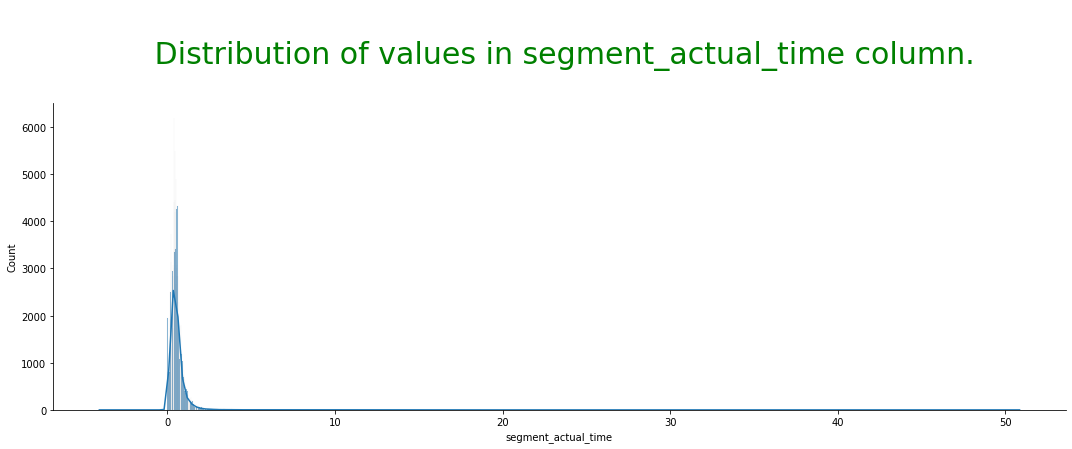

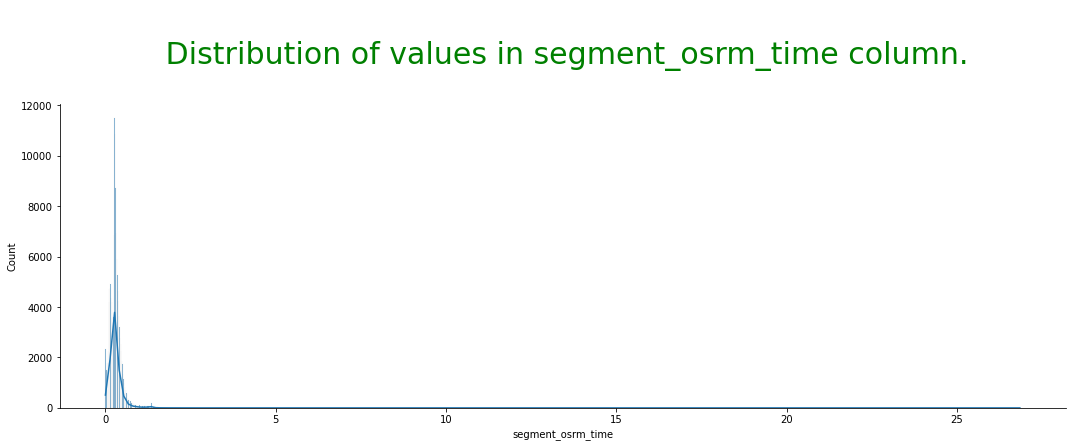

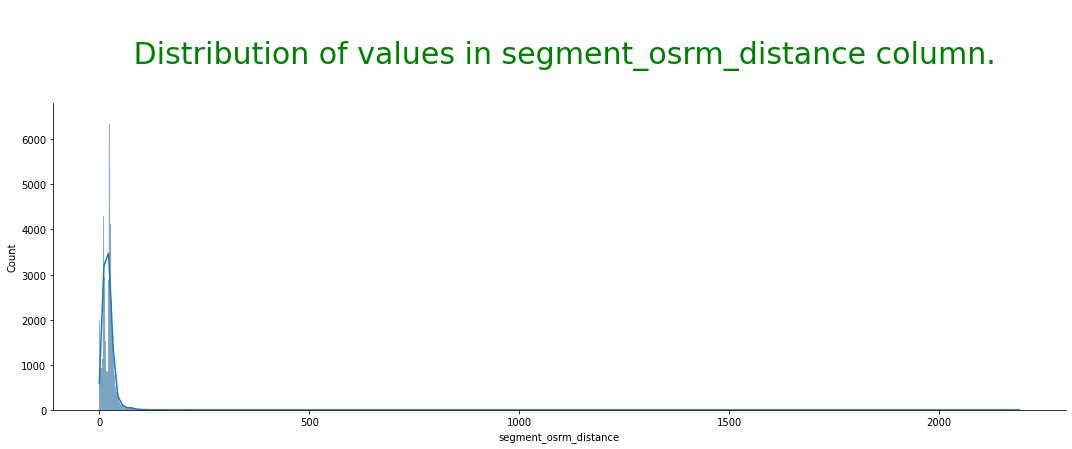

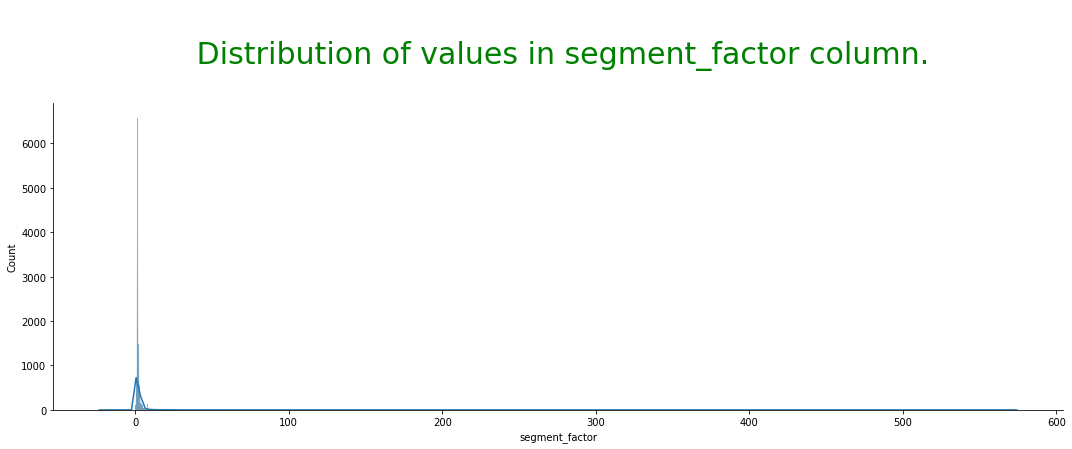

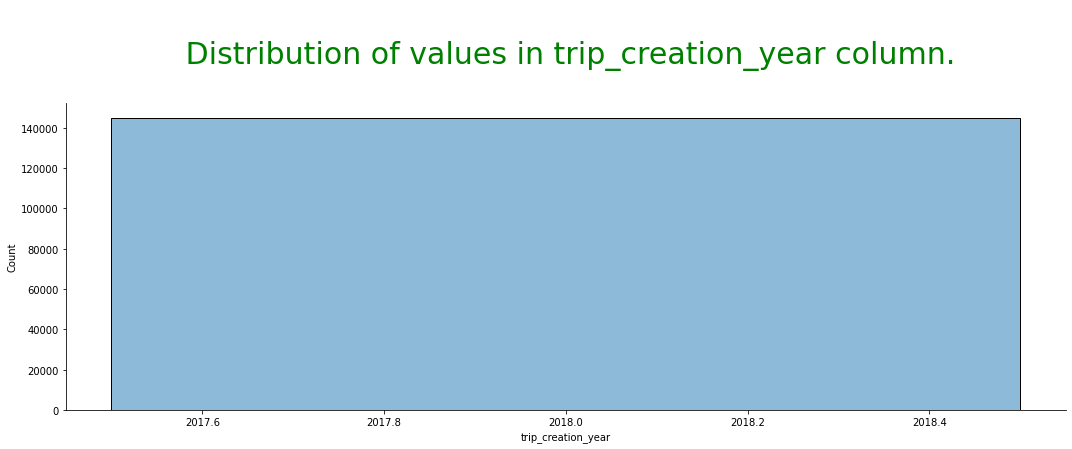

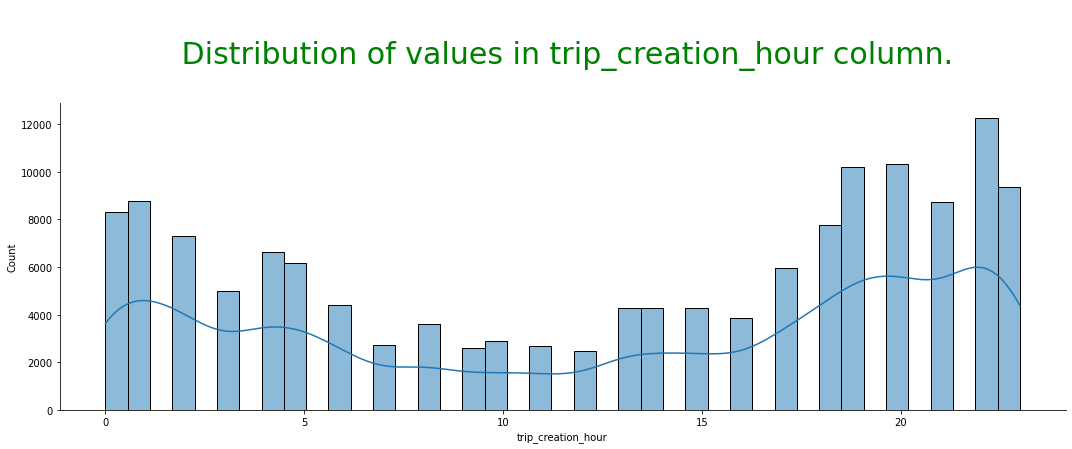

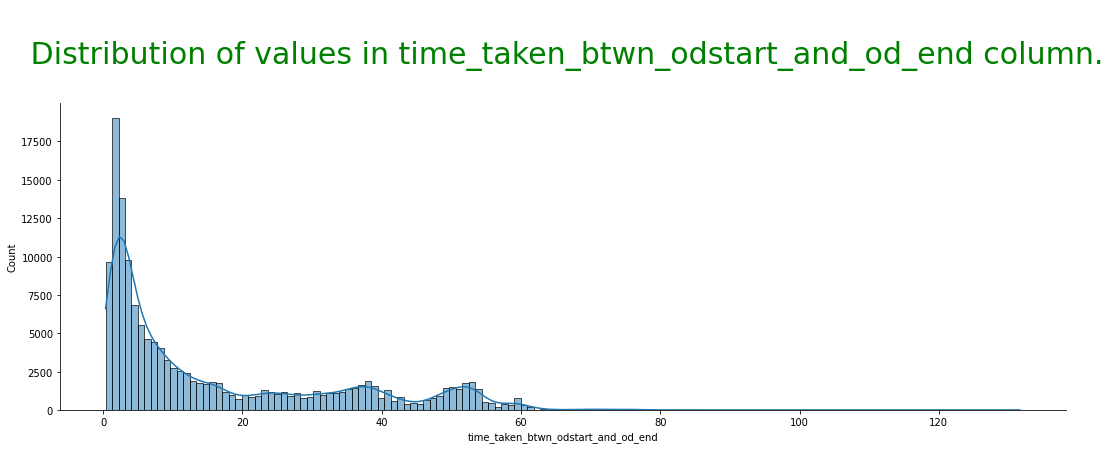

In [ ]:
continuous_types = ['int64', 'float64', 'datetime64[ns]']
for column in get_columns_by_types(data, continuous_types):
    sns.displot(data[column], kde=True, height=5, aspect=3)
    plt.title(f"\n Distribution of values in {column} column.\n", fontsize=30, color="green")
    plt.show()

## 6.2 Bivariate Analysis

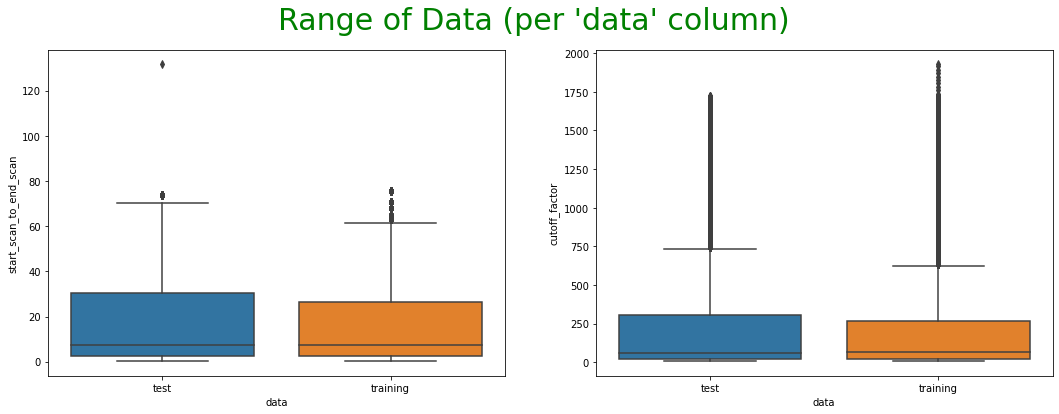

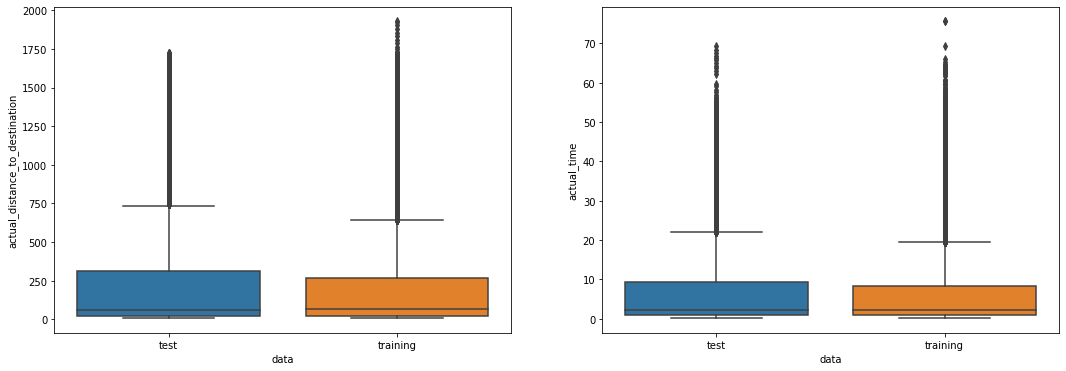

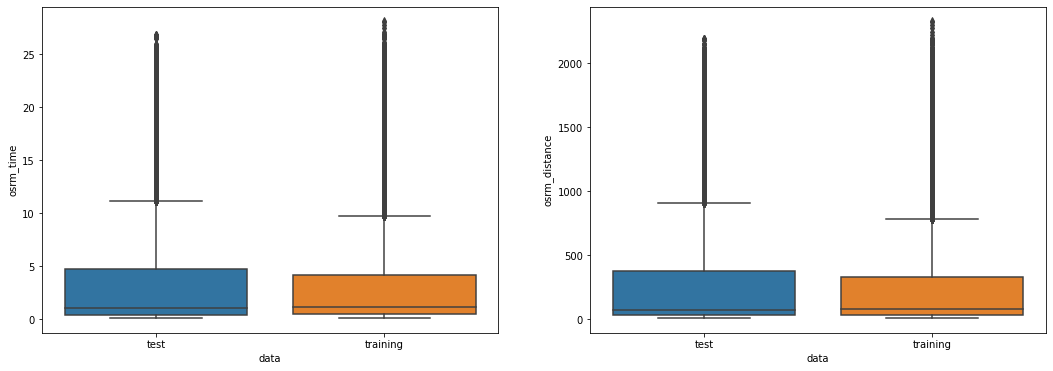

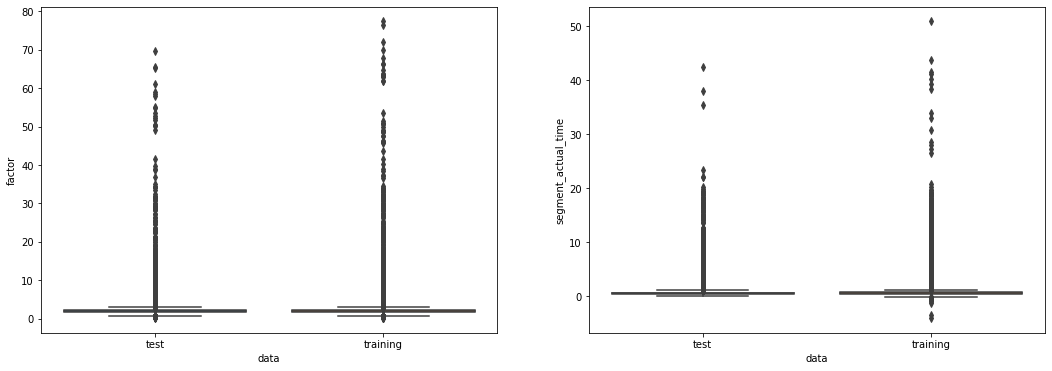

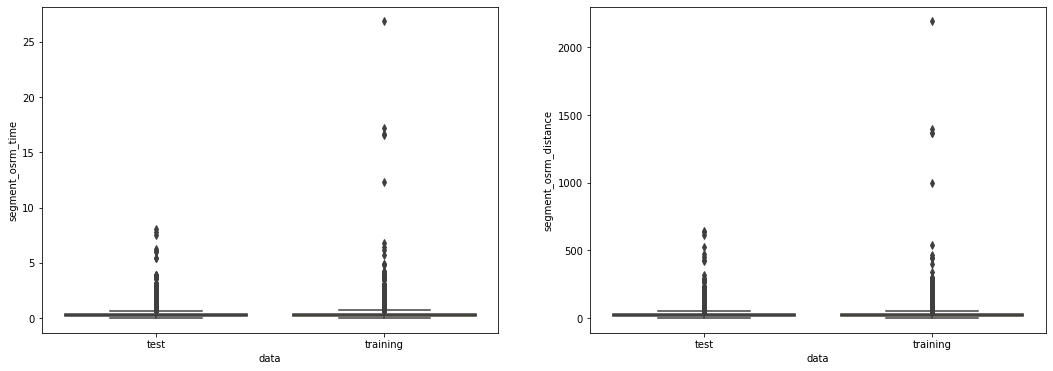

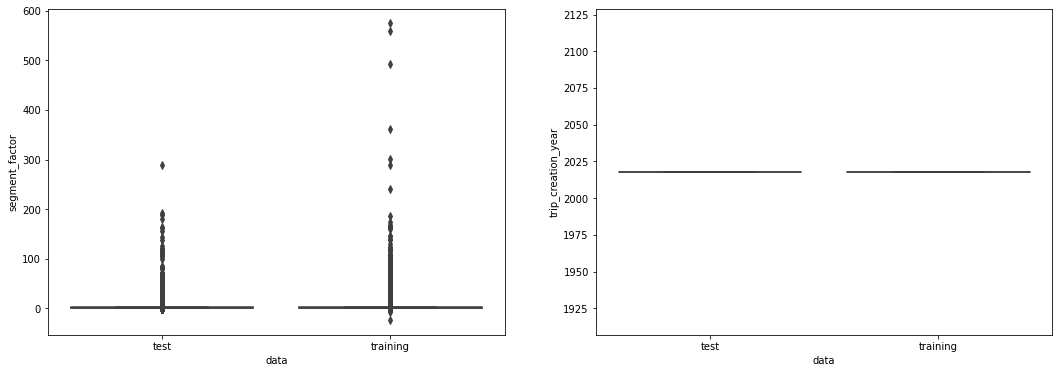

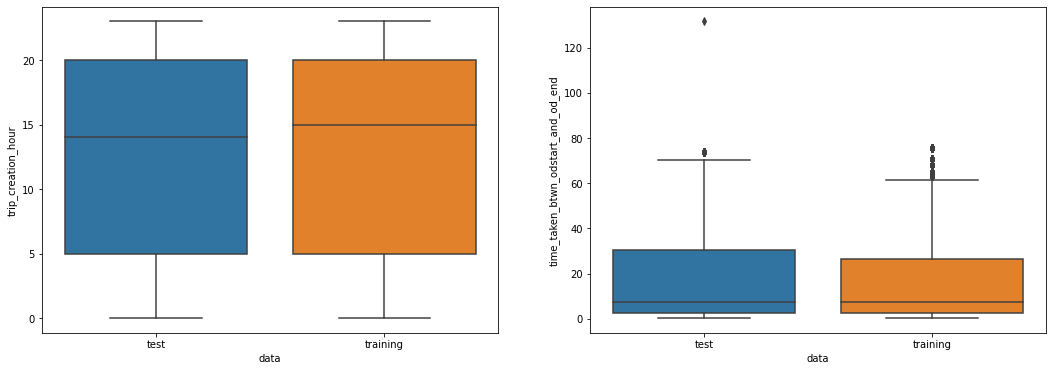

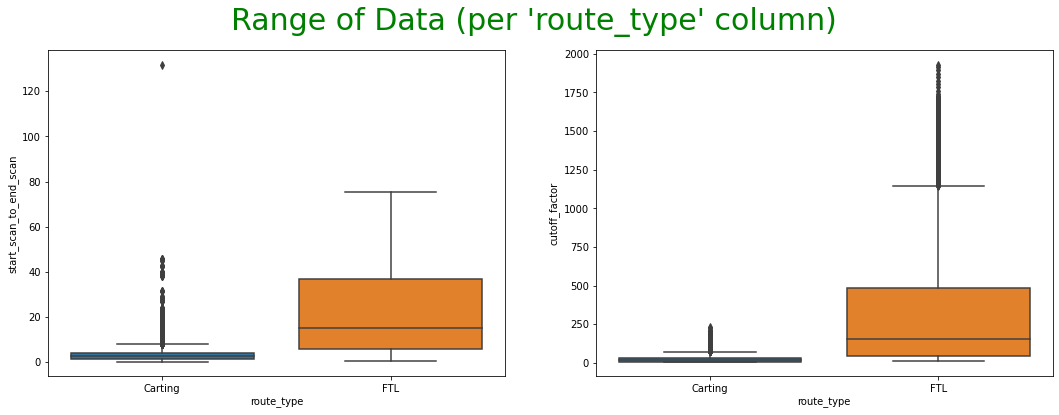

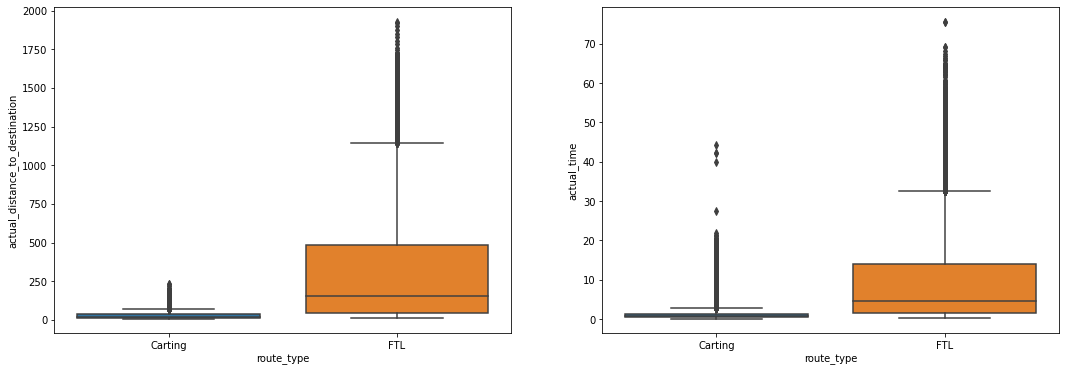

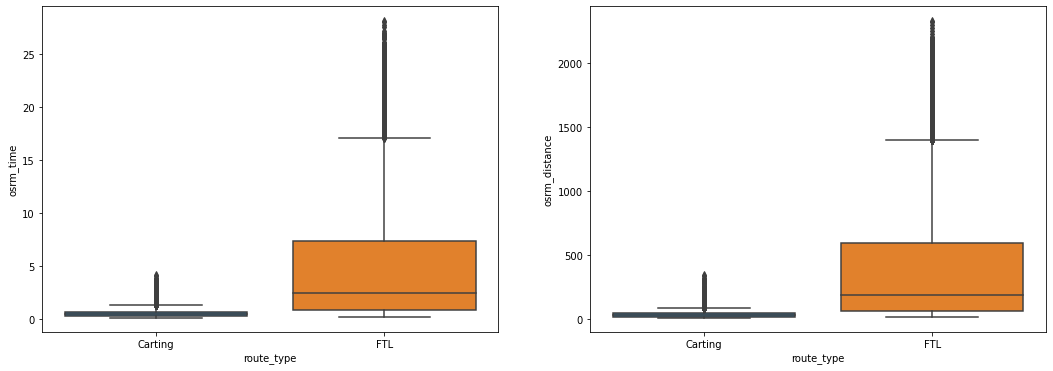

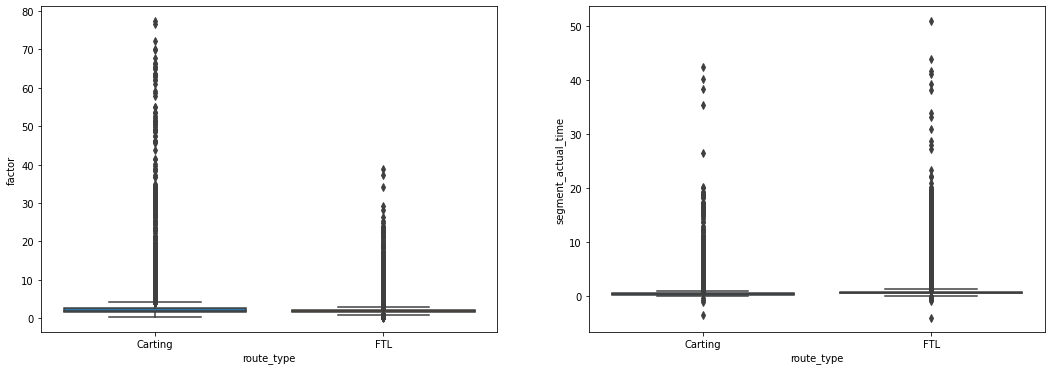

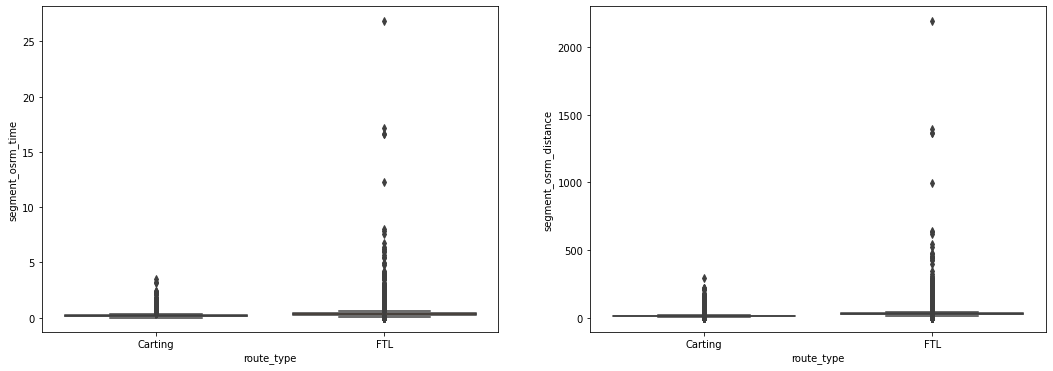

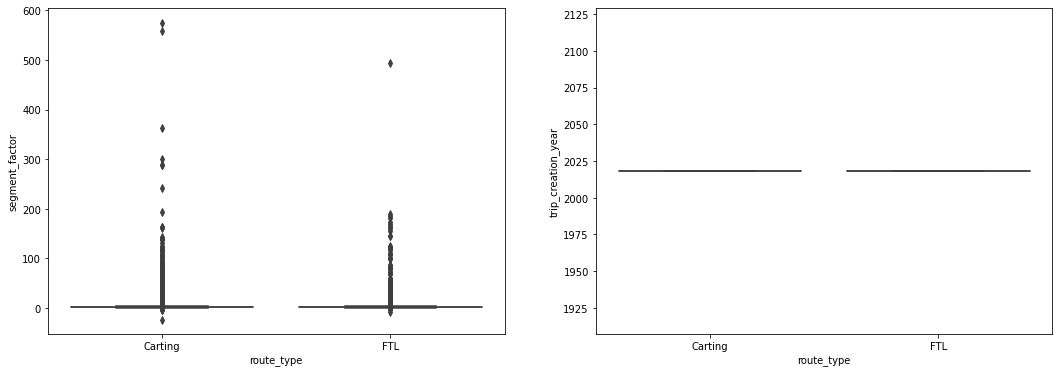

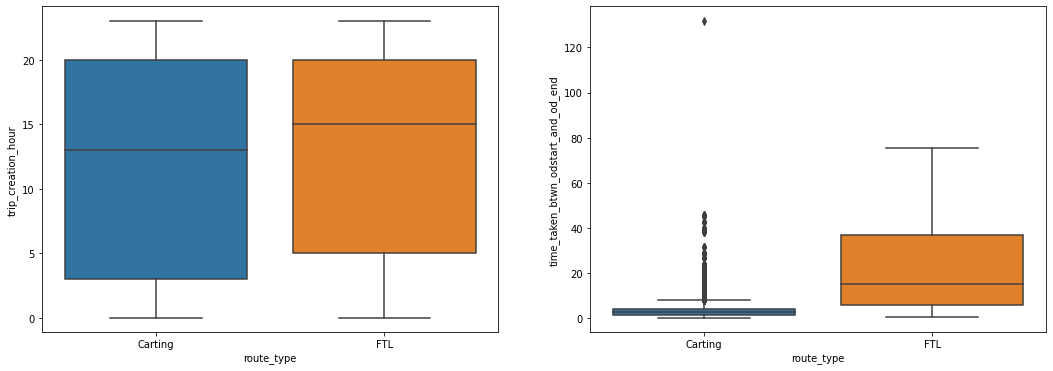

In [ ]:
for category in get_columns_by_types(data, categorical_types):
    column_index = 0
    while column_index < len(get_columns_by_types(data, numeric_types)):
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
        if  column_index == 0:
            fig.suptitle(f"Range of Data (per '{category}' column)", fontsize=30, color="green")
        sns.boxplot(data=data, y=get_columns_by_types(data, numeric_types)[column_index], ax=axes[0], x=category)
        column_index += 1
        if column_index < len(get_columns_by_types(data, numeric_types)):
            sns.boxplot(data=data, y=get_columns_by_types(data, numeric_types)[column_index], ax=axes[1], x=category)
            column_index += 1
        plt.show()

# 7 Analysis of Correlation Between Data

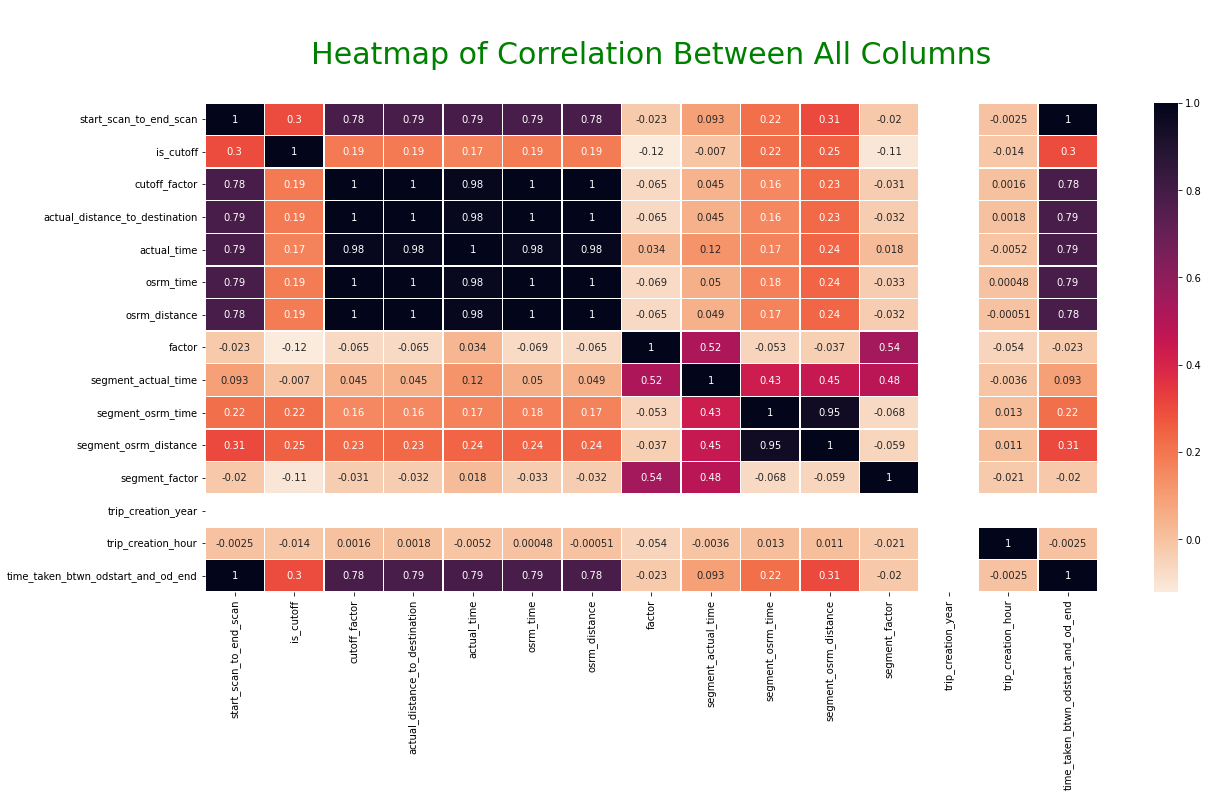

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(data.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

# 8 Hypothesis Testing

## 8.1 Hypothesis Tests for time durations and distance related features


****

### 8.1.1 Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan

#### 8.1.1.1 Mean time between trip
> H0: Mean of time taken betweenn trip end ans start time = Mean of start and end scan time
> H1: Mean of time taken betweenn trip end ans start time != Mean of start and end scan time


```
# This is formatted as code
```



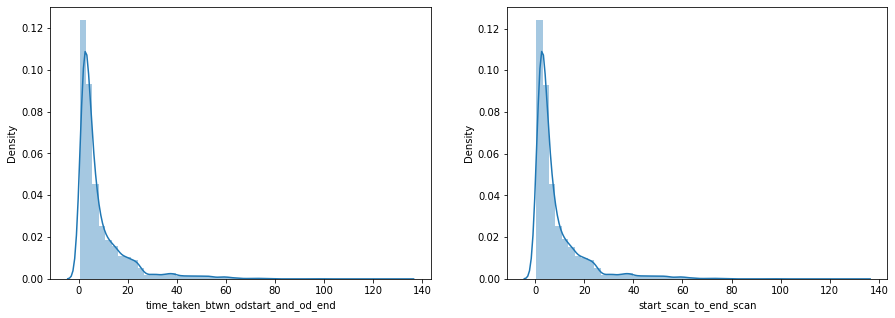

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))
plt.show()

#### 8.1.1.2 KS-test : checking the distributions how closly equal they are

In [ ]:
stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]
               ,start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.004184382803536474, pvalue=0.9994337058695081)

In [ ]:
for i in range(5):
    print(stats.ttest_ind((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000))))

Ttest_indResult(statistic=0.37754903448052535, pvalue=0.7057789900303639)
Ttest_indResult(statistic=0.7374837521995127, pvalue=0.46085706882115773)
Ttest_indResult(statistic=0.35542070696779143, pvalue=0.722286936256517)
Ttest_indResult(statistic=0.588568496409674, pvalue=0.5561729346341118)
Ttest_indResult(statistic=-0.20130932232384582, pvalue=0.840463539849455)


**Insights**
- From Kolmogorov–Smirnov test , p-value is 0.9943 , from which we can conclude  tht both the distributions
- The (time_taken_btwn_odstart_and_od_end and start_scan_to_end_scan) are closly similar.
- From 2 sample t-test ,we can also conclude that Average time_taken_btwn_odstart_and_od_end for population is also equal to Average start_scan_to_end_scan for population.

#### 8.1.1.3 Checking mean and standard deviation for timetaken and scan times

In [ ]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(8.861857235305113, 10.981665759990634)

In [ ]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.976286391439693)

**Insights**  
The variance and means both are closly similar for scan time and trip start and end time taken 


### 8.1.2 Analysing Actual Time taken to complete the delivery  &  start-scan-end-scan

#### 8.1.2.1 Mean Actual Time to complete delivery
- H0: Mean of start and end scan time <=  Mean of Actual time taken to complete delivery 
- H1: Mean of start and end scan time  > Mean of Actual time taken to complete delivery


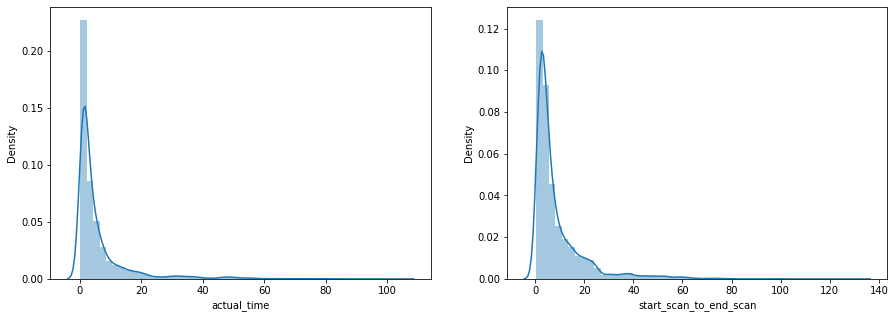

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [ ]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.27387460349598436, pvalue=0.0)

In [ ]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

Ttest_indResult(statistic=-10.243132749484564, pvalue=1.0085282613568382e-24)
Ttest_indResult(statistic=-8.569624884746686, pvalue=6.527167328188081e-18)
Ttest_indResult(statistic=-10.224366446567606, pvalue=1.2202000362551576e-24)
Ttest_indResult(statistic=-12.199878461015947, pvalue=3.907701697735116e-34)
Ttest_indResult(statistic=-10.273654669200148, pvalue=7.392751915731803e-25)
Ttest_indResult(statistic=-12.042972815004543, pvalue=2.5326628998269168e-33)
Ttest_indResult(statistic=-11.739892423473679, pvalue=8.778241113457195e-32)


#### 8.1.2.2 KS-test : checking the distributions how closly equal they are

- From KS test for actual-time and start_scan_to_end_scan distributions are not same.

- From ttest of population average actual_time is less than population average start_scan_to_end_scan.

In [ ]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.355547822973838)

In [ ]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.976286391439693)

### 8.1.3 Analysing Actual Time & TimeTaken between start and end trip time. 

#### 8.1.3.1 Mean of time taken betweenn trip end and start time
- H0: Mean of Actual time taken to complete delivery =  Mean of time taken betweenn trip end and start time
- H1: Mean of Actual time taken to complete delivery  !=  Mean of time taken betweenn trip end and start time

In [ ]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

KstestResult(statistic=0.2765067152594992, pvalue=0.0)

In [ ]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

Ttest_indResult(statistic=-7.209455600408839, pvalue=7.932086607410737e-13)
Ttest_indResult(statistic=-7.060218542613851, pvalue=2.284855293914485e-12)
Ttest_indResult(statistic=-7.991558988057182, pvalue=2.2307915433455522e-15)
Ttest_indResult(statistic=-7.421584889191737, pvalue=1.7028802615312428e-13)
Ttest_indResult(statistic=-5.752599725122491, pvalue=1.0145669381636967e-08)


#### 8.1.3.2 KS-test : checking the distributions how closely equal they are
- From above kstest of distribution and two sample ttest , 
- We can conclude that population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

### 8.1.4 Analysing  Actual Time   taken to complete delivery from source to destination hub    &   OSRM measured time : 

#### 8.1.4.1 Mean of Actual time taken to complete delivery 
- H0: Mean of OSRM time  >=  Mean of Actual time taken to complete delivery
- H1: Mean of OSRM time  <  Mean of Actual time taken to complete delivery 

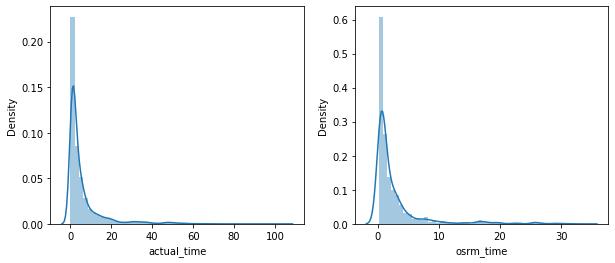

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

In [ ]:
stats.ks_2samp(actual_time["actual_time"],osrm_time["osrm_time"])

KstestResult(statistic=0.2945265573327934, pvalue=0.0)

In [ ]:
for i in range(5):
    print(stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater'))

Ttest_indResult(statistic=20.642768476113744, pvalue=4.787936485180131e-93)
Ttest_indResult(statistic=22.602186059266945, pvalue=1.1647742173921338e-110)
Ttest_indResult(statistic=22.461645890550624, pvalue=2.385631708810851e-109)
Ttest_indResult(statistic=21.98323818093817, pvalue=6.113401642122297e-105)
Ttest_indResult(statistic=22.024552448015463, pvalue=2.5641205308783893e-105)


#### 8.1.4.2 T-test : checking the distributions how closely equal they are
- From two sample ttest can conclude , that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same. 
> #### actual time is higher than the osrm estimated time for delivery.

In [ ]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.355547822973838)

In [ ]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.6973138962003107, 4.537654251845704)

### 8.1.5 Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :  

#### 8.1.5.1 Segment actual time
- H0: Actual time = segment actual time
- Ha: Actual time != segment actual time

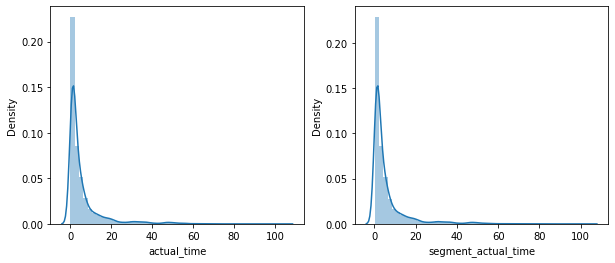

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

In [ ]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),
                (segment_actual_time["segment_actual_time"].sample(3000))))

Ttest_indResult(statistic=-1.1308004174596418, pvalue=0.258184316966999)
Ttest_indResult(statistic=0.8230786036218338, pvalue=0.4104960176171294)
Ttest_indResult(statistic=-0.9583379801046219, pvalue=0.3379309845768306)
Ttest_indResult(statistic=-1.7777971614452217, pvalue=0.07548782782209515)
Ttest_indResult(statistic=-0.6915447903604859, pvalue=0.48925000886811565)
Ttest_indResult(statistic=-0.5765635577650264, pvalue=0.5642559584830338)
Ttest_indResult(statistic=-0.18438115456694334, pvalue=0.85372068613465)


#### 8.1.5.2 T-test : checking the distributions how closely equal they are
- From two sample ttest , we can conclude that
    Population average for Actual Time taken to complete delivery trip and segment actual time are same. 


In [ ]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.355547822973838)

In [ ]:
segment_actual_time["segment_actual_time"].mean(),segment_actual_time["segment_actual_time"].std()

(5.8982047647971925, 9.27079941315281)

### 8.1.6 Analysing osrm Time  & segment-osrm-time  

#### 8.1.6.1 OSRM time
- H0: segment actual time <= OSRM time
- H1: segment actual time > OSRM time

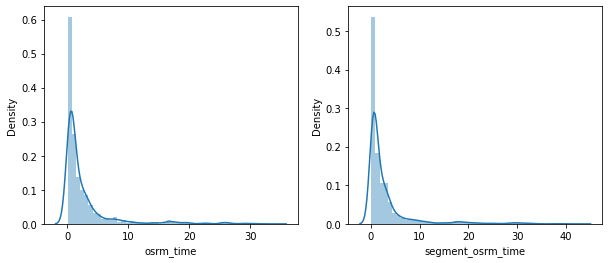

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

In [ ]:
for i in range(7):
    print(stats.ttest_ind((osrm_time["osrm_time"].sample(3000)),
                (segment_osrm_time["segment_osrm_time"].sample(3000)),alternative ="less"))

Ttest_indResult(statistic=-3.13197752234623, pvalue=0.0008723440267436966)
Ttest_indResult(statistic=-2.3393508994686556, pvalue=0.009674962502247328)
Ttest_indResult(statistic=-0.7676153761696264, pvalue=0.2213729704162627)
Ttest_indResult(statistic=-1.4602203024642157, pvalue=0.0721409559444178)
Ttest_indResult(statistic=-2.180654641399138, pvalue=0.014623848346381741)
Ttest_indResult(statistic=-2.8478050467936127, pvalue=0.0022085787862569897)
Ttest_indResult(statistic=-2.1051548415800645, pvalue=0.017659654956796927)


#### 8.1.6.2 T-test : checking the distributions how closely equal they are
- From ttest , we can conclude that 
    - Average of osrm Time & segment-osrm-time for population is not same. 
    - Population Mean osrm time  is less than Population Mean segment osrm time.


In [ ]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.6973138962003107, 4.537654251845704)

In [ ]:
segment_osrm_time["segment_osrm_time"].mean(),segment_osrm_time["segment_osrm_time"].std()


(3.0158297901059594, 5.242367441693001)

### 8.1.7 Analysing Distances measures

#### 8.1.7.1 Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance

- H0 : Segment OSRM distnace <= OSRM distance
- H1 : Segment OSRM distnace > OSRM distance

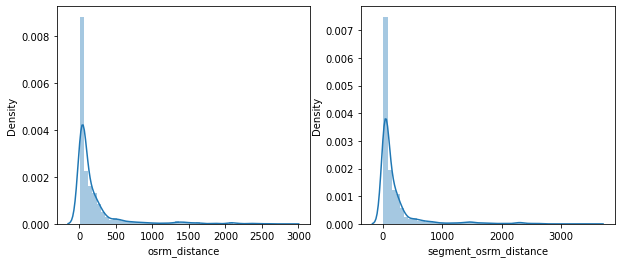

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

In [ ]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10)

In [ ]:
for i in range(7):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less"))

Ttest_indResult(statistic=-2.7655325819815815, pvalue=0.0028467088929883095)
Ttest_indResult(statistic=-3.148343929280284, pvalue=0.0008234068478939552)
Ttest_indResult(statistic=-2.6043770648798814, pvalue=0.0046088801390766565)
Ttest_indResult(statistic=-3.104716080624314, pvalue=0.0009549699084248505)
Ttest_indResult(statistic=-1.2669418252057523, pvalue=0.10260280173834316)
Ttest_indResult(statistic=-2.7814066544464504, pvalue=0.0027112624379535748)
Ttest_indResult(statistic=-3.120587825983975, pvalue=0.0009050218520805372)


In [ ]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551593, 370.74927471335474)

In [ ]:
segment_osrm_distance["segment_osrm_distance"].mean(),segment_osrm_distance["segment_osrm_distance"].std()

(223.20116128771005, 416.62837429074216)

#### 8.1.7.2 KS test : checking the distributions how closely equal they are
>    #### from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same! 
>    #### from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than  average of segment osrm distnace 

### 8.1.8 Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse

#### 8.1.8.1 Mean Actual distance
- H0 : Mean OSRM distance <= Mean Actual distance 
- H1 : Mean OSRM distance > Mean Actual distance 

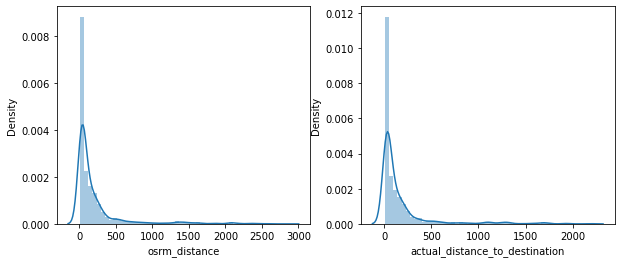

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((actual_distance_to_destination["actual_distance_to_destination"])))

In [ ]:
stats.ks_2samp(osrm_distance["osrm_distance"],actual_distance_to_destination["actual_distance_to_destination"])

KstestResult(statistic=0.11837753931295136, pvalue=6.578385372142345e-91)

In [ ]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               actual_distance_to_destination["actual_distance_to_destination"].sample(5000),alternative="greater"))

Ttest_indResult(statistic=5.555706437264528, pvalue=1.4178711045728721e-08)
Ttest_indResult(statistic=5.471663506864661, pvalue=2.2829442092646665e-08)
Ttest_indResult(statistic=5.717271915531602, pvalue=5.567585950549354e-09)
Ttest_indResult(statistic=6.84306215055128, pvalue=4.103144573808682e-12)
Ttest_indResult(statistic=5.008444558369537, pvalue=2.79046083902154e-07)


#### 8.1.8.2 T-test : checking the distributions how closely equal they are
- From left sided ttest , we can conclude 
     - For population OSRM estimated distance is higher than the actual distance  from source to destination warehouse. 

In [ ]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551593, 370.74927471335474)

In [ ]:
actual_distance_to_destination["actual_distance_to_destination"].mean(),actual_distance_to_destination["actual_distance_to_destination"].std()

(164.47332174544243, 305.5408288910492)

****

****
****

****

# 9 Merging All the numerical Fields as per TripID

In [ ]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,
                                                                             on="trip_uuid"),
                                                                            on="trip_uuid")

In [ ]:
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,
                                         on="trip_uuid",
                                         ),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

In [ ]:
Merge1 = time.merge(distances,on="trip_uuid",
                                        )

In [ ]:
Merge1

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635


## 9.1 Merging Location details and route_type and Numerical data on TripID

In [ ]:
city = data.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = data.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = data.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [ ]:
route_type = data.groupby("trip_uuid")["route_type"].unique().reset_index()

In [ ]:
Merged = route_type.merge(locations.merge(Merge1,on="trip_uuid",
           how="outer"),
                 on="trip_uuid",
           how="outer"
                )

In [ ]:
trip_records = Merged.copy()

In [ ]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])

In [ ]:
route_to_merge = data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()

In [ ]:
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")

In [ ]:
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])

In [ ]:
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [ ]:
# route_df['source'] = route_df['source'].str.strip("{''}")

In [ ]:
trip_records.isna().sum()

trip_uuid                              0
route_type                             0
source_city                            0
destination_city                       0
source_city_state                     10
destination_city_state                 8
source_state                          10
destination_state                      8
segment_osrm_time                      0
osrm_time                              0
segment_actual_time                    0
actual_time                            0
time_taken_btwn_odstart_and_od_end     0
start_scan_to_end_scan                 0
segment_osrm_distance                  0
actual_distance_to_destination         0
osrm_distance                          0
route_schedule_uuid                    0
dtype: int64

In [ ]:
trip_records.loc[trip_records.isnull().any(axis=1)]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
5289,trip-153733592611290696,Carting,Gurgaon,Unknown,Gurgaon Haryana,NaN,Haryana,None,0.600000,0.566667,1.200000,1.216667,3.437326,3.433333,39.4788,30.407059,35.3948,thanos::sroute:e591febd-564c-499a-ad94-6fa4b7f...
5778,trip-153739792417979729,FTL,Luxettipet,Unknown,Luxettipet Telangana,NaN,Telangana,None,0.966667,0.966667,2.600000,2.616667,2.964513,2.950000,64.6296,51.604090,64.6296,thanos::sroute:0fe10045-cf65-4c70-8115-4e4cf80...
5961,trip-153741501937042684,Carting,Gurgaon,Unknown,Gurgaon Haryana,NaN,Haryana,None,0.550000,0.583333,1.583333,1.600000,4.748660,4.733333,35.5767,29.227677,35.5767,thanos::sroute:e591febd-564c-499a-ad94-6fa4b7f...
8762,trip-153776806236494354,FTL,Unknown,Mainpuri,NaN,Mainpuri Uttar Pradesh,None,Uttar Pradesh,3.950000,3.900000,4.283333,4.300000,4.352243,4.350000,315.5863,236.815038,294.2514,thanos::sroute:265efe06-3625-4fba-afee-07b5b64...
8796,trip-153777348608709328,FTL,Aligarh,Unknown,Aligarh Uttar Pradesh,NaN,Uttar Pradesh,None,1.233333,1.233333,3.033333,3.050000,3.786026,3.783333,92.1350,76.647402,92.1309,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...
9835,trip-153791004076950775,FTL,Unknown,Chikmagalur,NaN,Chikmagalur Karnataka,None,Karnataka,0.883333,0.766667,0.683333,0.700000,0.743173,0.733333,52.0094,35.760236,49.5545,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...
10562,trip-153800051661903546,FTL,Unknown,Unknown,NaN,NaN,None,None,0.800000,0.816667,2.116667,2.133333,2.146146,2.133333,60.9205,50.844665,60.9205,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...
11468,trip-153811367563100850,FTL,Unknown,Mainpuri,NaN,Mainpuri Uttar Pradesh,None,Uttar Pradesh,1.650000,1.466667,3.500000,3.516667,4.195233,4.183333,126.3234,99.115749,110.1333,thanos::sroute:3c657b6b-38e9-437f-a02f-1cd0a27...
12097,trip-153820032399976293,FTL,Unknown,Mainpuri,NaN,Mainpuri Uttar Pradesh,None,Uttar Pradesh,1.683333,1.466667,3.016667,3.033333,4.312456,4.300000,126.5971,99.026861,110.1448,thanos::sroute:3c657b6b-38e9-437f-a02f-1cd0a27...
13104,trip-153835867702133730,FTL,Unknown,Mathura,NaN,Mathura Uttar Pradesh,None,Uttar Pradesh,1.600000,1.266667,1.950000,1.950000,3.104244,3.100000,95.9942,44.104960,81.9201,thanos::sroute:ae08e84c-e6e4-411a-8c2f-27af4cf...


In [ ]:
trip_records[trip_records["trip_uuid"]=="trip-153852612674280168"]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
14199,trip-153852612674280168,FTL,Unknown,Mathura,NaN,Mathura Uttar Pradesh,None,Uttar Pradesh,1.533333,1.266667,1.433333,1.433333,2.792559,2.783333,90.9055,44.089609,80.8431,thanos::sroute:ae08e84c-e6e4-411a-8c2f-27af4cf...


In [ ]:
trip_records.dropna(axis= 0,how = 'any',inplace = True)

In [ ]:
trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

### 9.1.1 Checking if any null values left in Trip Records Data 

In [ ]:
trip_records.isna().sum()

trip_uuid                             0
route_type                            0
source_city                           0
destination_city                      0
source_city_state                     0
destination_city_state                0
source_state                          0
destination_state                     0
segment_osrm_time                     0
osrm_time                             0
segment_actual_time                   0
actual_time                           0
time_taken_btwn_odstart_and_od_end    0
start_scan_to_end_scan                0
segment_osrm_distance                 0
actual_distance_to_destination        0
osrm_distance                         0
route_schedule_uuid                   0
dtype: int64

In [ ]:
trip_records.loc[trip_records.isnull().any(axis=1)]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid


In [ ]:
trip_records.corr()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
segment_osrm_time,1.000000,0.993508,0.953207,0.953965,0.918915,0.918962,0.996092,0.987628,0.992050
osrm_time,0.993508,1.000000,0.957931,0.958794,0.926779,0.926970,0.991847,0.993557,0.997610
segment_actual_time,0.953207,0.957931,1.000000,0.999920,0.961160,0.961171,0.956287,0.953238,0.958532
actual_time,0.953965,0.958794,0.999920,1.000000,0.961024,0.961229,0.957127,0.954268,0.959478
time_taken_btwn_odstart_and_od_end,0.918915,0.926779,0.961160,0.961024,1.000000,0.999860,0.919648,0.918883,0.924605
start_scan_to_end_scan,0.918962,0.926970,0.961171,0.961229,0.999860,1.000000,0.919781,0.919181,0.924881
segment_osrm_distance,0.996092,0.991847,0.956287,0.957127,0.919648,0.919781,1.000000,0.993207,0.994920
actual_distance_to_destination,0.987628,0.993557,0.953238,0.954268,0.918883,0.919181,0.993207,1.000000,0.997273
osrm_distance,0.992050,0.997610,0.958532,0.959478,0.924605,0.924881,0.994920,0.997273,1.000000


In [ ]:
trip_records.to_csv("trip_records.csv")

### 9.1.2 Treating Outliers 

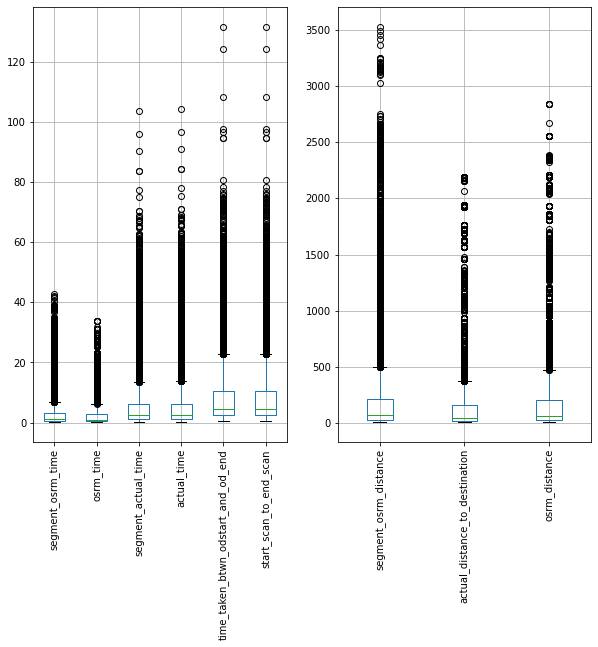

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [ ]:
outlier_treatment  = trip_records.copy()

In [ ]:
outlier_treatment_num = outlier_treatment[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

In [ ]:
# outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)]

### 9.1.3 After removing outliers from all numerical features

In [ ]:
trip_records_without_outliers = trip_records.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,Carting,Chennai,Chennai,Chennai Tamil Nadu,Chennai Tamil Nadu,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [ ]:
trip_records_without_outliers = trip_records_without_outliers[['trip_uuid','route_type','source_city_state', 'destination_city_state','segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']]

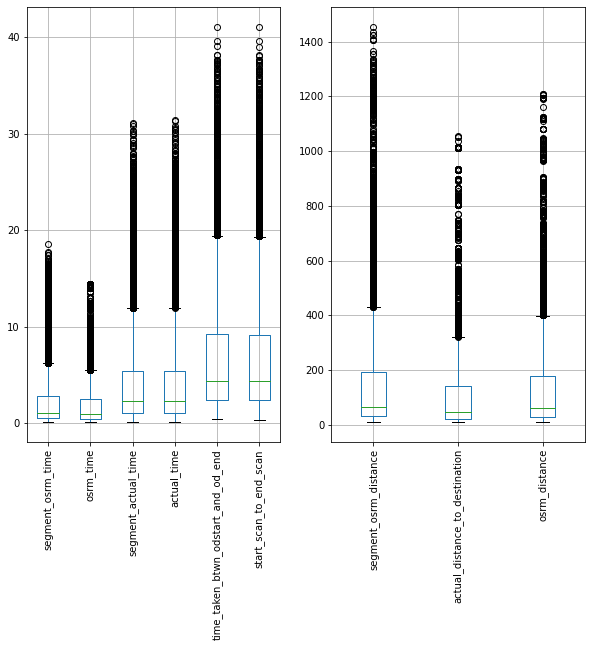

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records_without_outliers[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records_without_outliers[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

### 9.1.4 Processing Data for One hot encoding

Merging locations details into one columns . and re categorise the data as per highest trips having location as top category 


In [ ]:
trip_records_without_outliers["destination_source_locations"] = trip_records_without_outliers["source_city_state"]+" "+trip_records_without_outliers["destination_city_state"]
trip_records_without_outliers.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)


In [ ]:
sc_dc = trip_records_without_outliers.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()


In [ ]:
# trip_records.groupby(['source_state','destination_state'])["trip_uuid"].nunique().sort_values(ascending= False).reset_index().head(30)

In [ ]:
def get_cat(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [ ]:
sc_dc["city"]  = pd.Series(map(get_cat,sc_dc["trip_uuid"]))


In [ ]:
trip_records_for_encoding = sc_dc.merge(trip_records_without_outliers,
            on="destination_source_locations")
trip_records_for_encoding.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)

In [ ]:
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)
# trip_records_for_encoding.sample(15)

In [ ]:
encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )

In [ ]:
encoded_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,1.383333,0.950000,3.183333,3.233333,4.407028,4.400000,76.1272,42.240305,53.1902,1,0,1,0,0,0,0,0,0
1,1.150000,0.883333,2.666667,2.700000,4.063014,4.050000,59.1472,28.706240,43.5805,1,0,1,0,0,0,0,0,0
2,1.183333,0.966667,3.316667,3.333333,4.076829,4.066667,65.6004,42.150597,62.8568,1,0,1,0,0,0,0,0,0
3,0.700000,0.733333,1.316667,1.316667,4.915934,4.900000,41.8593,32.569779,42.0797,1,0,1,0,0,0,0,0,0
4,0.783333,0.666667,1.750000,1.766667,3.248617,3.233333,39.3452,29.584603,35.5419,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14139,1.416667,1.416667,2.250000,2.250000,16.665480,16.633333,93.8712,78.315119,93.8712,0,1,0,0,0,0,0,0,1
14140,0.916667,0.933333,3.066667,3.100000,15.495155,15.483333,72.6371,67.318676,72.6370,0,1,0,0,0,0,0,0,1
14141,0.300000,0.300000,0.583333,0.583333,1.227734,1.216667,18.3930,15.950641,18.3930,0,1,0,0,0,0,0,0,1
14142,1.050000,1.066667,3.116667,3.116667,3.779336,3.766667,74.7857,62.763000,74.7857,0,1,0,0,0,0,0,0,1


In [ ]:
['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan' ,'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance' ]

['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269289,-0.409762,-0.220506,-0.215127,-0.394519,-0.392295,-0.362848,-0.450953,-0.468243
1,-0.359897,-0.438982,-0.324769,-0.322057,-0.445953,-0.444716,-0.448923,-0.542310,-0.521474
2,-0.346953,-0.402458,-0.193600,-0.195078,-0.443887,-0.442220,-0.416211,-0.451559,-0.414697
3,-0.534643,-0.504727,-0.597197,-0.599406,-0.318432,-0.317408,-0.536560,-0.516231,-0.529787
4,-0.502283,-0.533947,-0.509751,-0.509184,-0.567714,-0.567031,-0.549305,-0.536381,-0.566002


In [ ]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098792,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.090329,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090669,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111311,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070296,0.070111,0.020957,0.019694,0.022047


In [ ]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269289,-0.409762,-0.220506,-0.215127,-0.394519,-0.392295,-0.362848,-0.450953,-0.468243
1,-0.359897,-0.438982,-0.324769,-0.322057,-0.445953,-0.444716,-0.448923,-0.542310,-0.521474
2,-0.346953,-0.402458,-0.193600,-0.195078,-0.443887,-0.442220,-0.416211,-0.451559,-0.414697
3,-0.534643,-0.504727,-0.597197,-0.599406,-0.318432,-0.317408,-0.536560,-0.516231,-0.529787
4,-0.502283,-0.533947,-0.509751,-0.509184,-0.567714,-0.567031,-0.549305,-0.536381,-0.566002
...,...,...,...,...,...,...,...,...,...
14139,-0.256345,-0.205223,-0.408852,-0.412279,1.438255,1.439939,-0.272899,-0.207442,-0.242900
14140,-0.450506,-0.417067,-0.244050,-0.241860,1.263278,1.267699,-0.380540,-0.281670,-0.360522
14141,-0.689972,-0.694657,-0.745182,-0.746434,-0.869859,-0.869075,-0.655517,-0.628413,-0.660994
14142,-0.398730,-0.358628,-0.233960,-0.238518,-0.488366,-0.487152,-0.369648,-0.312422,-0.348620


In [ ]:
one_hot_encoded_data = encoded_data[["route_type_Carting","route_type_FTL","city_Category 1",
 "city_Category 2","city_Category 3","city_Category 4",
 "city_Category 5","city_Category 6","city_Category 7"]]

In [ ]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)

In [ ]:
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [ ]:
Standardized_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
12904,-0.431090,-0.387848,-0.489571,-0.489134,-0.710478,-0.709316,-0.346226,-0.287185,-0.323093,0,1,0,0,0,0,0,0,1
5298,-0.062183,-0.102953,-0.270956,-0.268592,-0.374586,-0.372325,-0.074998,-0.049607,-0.034751,0,1,0,0,0,0,0,1,0
3876,-0.554059,-0.570472,-0.529931,-0.532575,-0.745381,-0.744263,-0.542020,-0.566364,-0.561318,1,0,0,0,0,0,1,0,0
12482,0.494414,0.401090,0.781759,0.787338,0.883737,0.883279,0.497301,0.544960,0.472563,0,1,0,0,0,0,0,0,1
7966,0.701520,0.496055,0.102371,-0.051391,1.250346,1.097955,0.575478,0.416238,0.480612,0,1,0,0,0,0,0,0,1


In [ ]:
Min_Max_Scaled_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
214,0.044144,0.058140,0.028032,0.028282,0.107605,0.107421,0.029445,0.030907,0.035429,1,0,1,0,0,0,0,0,0
4804,0.005405,0.006977,0.009164,0.009072,0.024787,0.024600,0.003755,0.000635,0.004518,1,0,0,0,0,0,0,1,0
823,0.013514,0.016279,0.026415,0.026147,0.052064,0.052071,0.006432,0.007887,0.007255,1,0,1,0,0,0,0,0,0
8658,0.288288,0.366279,0.291644,0.291355,0.249451,0.249282,0.246350,0.235180,0.253152,0,1,0,0,0,0,0,0,1
9687,0.124324,0.162791,0.173046,0.171825,0.184008,0.183682,0.106450,0.115142,0.128082,0,1,0,0,0,0,0,0,1


# 10 Route analysis


In [ ]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]

In [ ]:
I = data.groupby("route_schedule_uuid")[["source_city",
                                         "destination_city"]].nunique().sort_values(by="source_city",
                                                                                     ascending=False).reset_index()
I.columns = ["route_schedule_uuid","#source_cities"
             ,"#destination_cities"]

In [ ]:
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

In [ ]:
# route_records.sort_values(by="Average_Actual_distance_to_destination",ascending=False)

In [ ]:
route_records.isna().sum()

route_schedule_uuid                       0
#source_cities                            0
#destination_cities                       0
Number_of_Trips                           6
Average_Actual_distance_to_destination    6
#source_states                            0
#destination_states                       0
destination_states                        0
source_states                             0
source_cities                             0
route_type                                0
destination_cities                        0
dtype: int64

In [ ]:
route_records.dropna(inplace=True)

In [ ]:
route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")
                             
route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")                        

In [ ]:
route_records

,route_schedule_uuid,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:d010efca-d90d-4977-b987-eae68c5...,13,11,14.0,281.596486,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,"FTL]\nCategories (2, object): [Carting, FTL",Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,10,10,12.0,332.602225,2,2,Assam Meghalaya,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,"FTL]\nCategories (2, object): [Carting, FTL",Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,thanos::sroute:ae5c430f-6153-48d1-8fe5-d5f0bbc...,10,10,20.0,351.611796,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,"FTL]\nCategories (2, object): [Carting, FTL",Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
3,thanos::sroute:f8968c72-5222-4d81-9eed-8a6d88f...,9,9,9.0,195.257193,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,"FTL]\nCategories (2, object): [Carting, FTL",Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
4,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,9,8,20.0,178.737233,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,"FTL]\nCategories (2, object): [Carting, FTL",Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,thanos::sroute:606ac3c5-bea9-4000-8d84-4397226...,1,1,5.0,37.084398,1,1,Haryana,Delhi,Delhi,"Carting]\nCategories (2, object): [Carting, FTL",Gurgaon
1500,thanos::sroute:6f20715d-5684-4595-a986-2836d48...,1,1,16.0,1078.076312,1,1,Maharashtra,Haryana,Gurgaon,"FTL]\nCategories (2, object): [Carting, FTL",Bhiwandi
1501,thanos::sroute:6f0bd656-6353-4cc9-b826-439edc9...,1,1,4.0,17.538461,1,1,Gujarat,Gujarat,Surat,"Carting]\nCategories (2, object): [Carting, FTL",Surat
1502,thanos::sroute:418b2f33-1b2d-450b-b84a-c3ea278...,1,1,21.0,29.003756,1,1,Gujarat,Gujarat,Ahmedabad,"Carting]\nCategories (2, object): [Carting, FTL",Ahmedabad


In [ ]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]

In [ ]:
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)

In [ ]:
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column) 

In [ ]:
route_records["SouceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])

In [ ]:
first_column = route_records.pop('SouceToDestination_city')
route_records.insert(0, 'SouceToDestination_city', first_column) 

In [ ]:
route_records

,SouceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,Guwahati TO LakhimpurN,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,13,11,14.0,281.596486,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,"FTL]\nCategories (2, object): [Carting, FTL",Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,Guwahati TO Tura,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,10,10,12.0,332.602225,2,2,Assam Meghalaya,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,"FTL]\nCategories (2, object): [Carting, FTL",Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,Jaipur TO Tarnau,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,10,10,20.0,351.611796,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,"FTL]\nCategories (2, object): [Carting, FTL",Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
3,Mangalore TO Udupi,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,9,9,9.0,195.257193,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,"FTL]\nCategories (2, object): [Carting, FTL",Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
4,Ajmer TO Raipur,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,9,8,20.0,178.737233,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,"FTL]\nCategories (2, object): [Carting, FTL",Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Delhi TO Gurgaon,Delhi -- Gurgaon,1,1,5.0,37.084398,1,1,Haryana,Delhi,Delhi,"Carting]\nCategories (2, object): [Carting, FTL",Gurgaon
1500,Gurgaon TO Bhiwandi,Gurgaon -- Bhiwandi,1,1,16.0,1078.076312,1,1,Maharashtra,Haryana,Gurgaon,"FTL]\nCategories (2, object): [Carting, FTL",Bhiwandi
1501,Surat TO Surat,Surat -- Surat,1,1,4.0,17.538461,1,1,Gujarat,Gujarat,Surat,"Carting]\nCategories (2, object): [Carting, FTL",Surat
1502,Ahmedabad TO Ahmedabad,Ahmedabad -- Ahmedabad,1,1,21.0,29.003756,1,1,Gujarat,Gujarat,Ahmedabad,"Carting]\nCategories (2, object): [Carting, FTL",Ahmedabad


In [ ]:
route_records.to_csv("route_records.csv")

## 10.1  Exploratory Data Analysis : ( getting some  insights from preprocessed data )

### 10.1.1 Busiest Route Analysis : 


###### 10.1.1.1 Number of Trips between cities , sorted highest to lowest
- Top 20 source and destination cities wihc have high freqency of trips in between . 

In [ ]:
Number_of_trips_between_cities = data.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(25)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
9,MAA Tamil Nadu,Chennai Tamil Nadu,204


- From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka	,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad Gujarat,Pune Maharashtra,Chandigarh Chandigarh and Kolkata West Bengal	 are some cities have higest amount of trips happening states with in the city :	

In [ ]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(25)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
9,MAA Tamil Nadu,Chennai Tamil Nadu,204
10,Chennai Tamil Nadu,MAA Tamil Nadu,141
11,Bengaluru Karnataka,HBR Karnataka,133
13,Pune Maharashtra,PNQ Maharashtra,122
16,Pune Maharashtra,Bhiwandi Maharashtra,107


- If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are : 
        delhi to gurgao
        Gurgaon,Haryana TO Bengaluru,Karnataka
        Bhiwandi/Mumbai,Maharashtra TO Pune Maharashtra
        Sonipat TO	Gurgaon,Haryana
        
      - it is also been observed that lots of deliveries are happening to airpots 
      - like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to	CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru Internation Airport etc. 
        

In [ ]:
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by="Number_of_Trips",ascending=False).head(25)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
1452,LowerParel -- Mumbai,53.0,16.428868,1,1
1163,Mumbai -- Bhiwandi,46.0,20.199445,1,1
837,Gurgaon -- Gurgaon,43.0,29.740842,1,1
807,Jaipur -- Ambabadi Jaipur,41.0,15.348495,1,2
1108,Noida -- Del,40.0,10.882902,1,1
1294,Hyderabad -- Hyderabad,39.0,35.695641,1,1
1213,Mumbai -- Mumbai,37.0,13.882863,1,1
1395,Mumbai -- Mumbai,36.0,17.526251,1,1
1334,Bhiwandi -- Mumbai,35.0,21.241534,1,1
959,Mumbai -- Mumbai,34.0,15.906614,1,1


###### 10.1.1.2 Top Routes having Maximum Number of Trips between/within the source and destinations . 

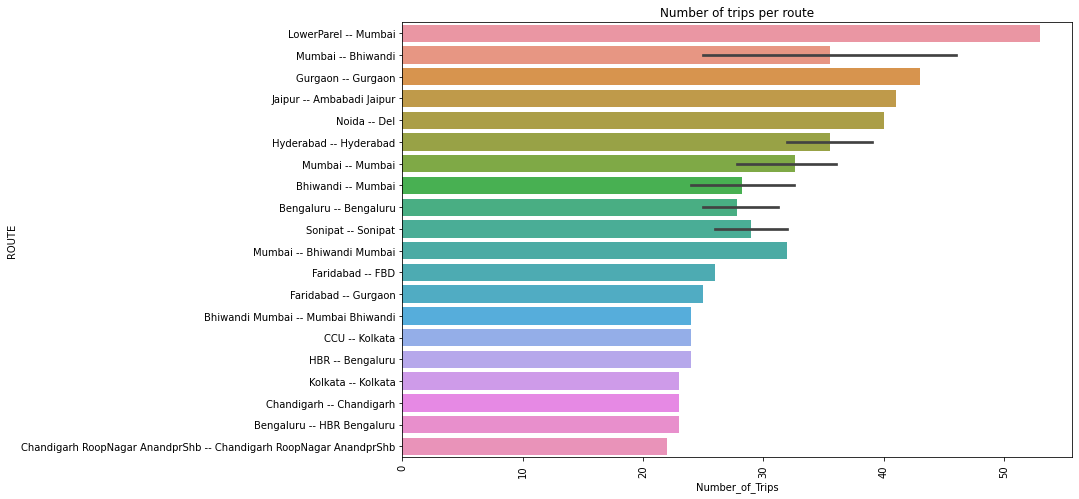

In [ ]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Number_of_Trips",
               ]].sort_values(by="Number_of_Trips",ascending=False).head(35)
sns.barplot(y = X["ROUTE"],
           x= X["Number_of_Trips"])
plt.title("Number of trips per route")
plt.xticks(rotation = 90)
plt.show()

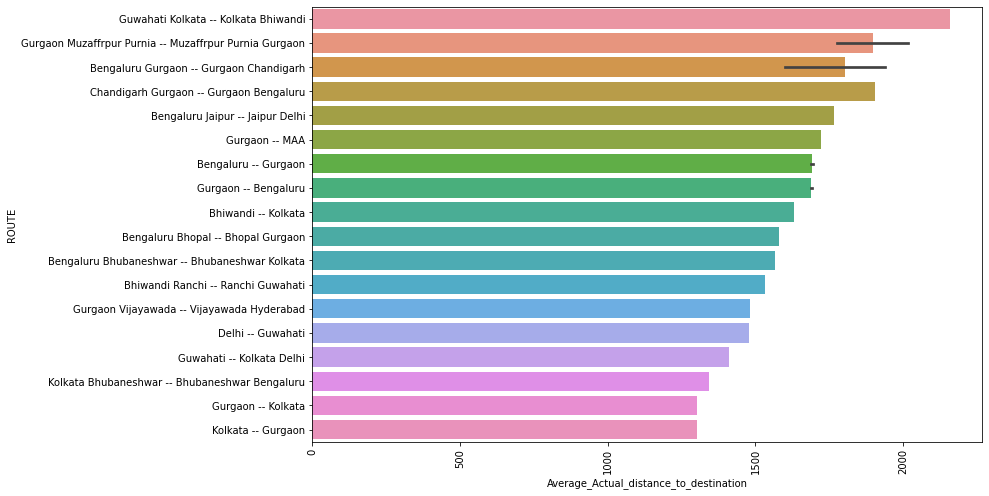

In [ ]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Average_Actual_distance_to_destination",
               ]].sort_values(by="Average_Actual_distance_to_destination",ascending=False).head(25)
sns.barplot(y = X["ROUTE"],
           x = X["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

**Insights**  
- From above Bar chart , and table , we can observe that higest trips are happening is with in the particular cities. 
- In terms of average distnace between destinations , we can observe Guwahati to Mumbai , Benglore to Chandigarh ,Benglore to Delhi  , Benglore to Gurgaon are the longest routes .


### 10.1.2 Busiest and Longest Routes

In [ ]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75)) 
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)

In [ ]:
Busiest_and_Longest_Routes_top25 = Busiest_and_Longest_Routes[["source_cities",
                                                               "destination_cities",
                                                               "Number_of_Trips",
                                                               "Average_Actual_distance_to_destination"]].head(25)
Busiest_and_Longest_Routes_top25

,source_cities,destination_cities,Number_of_Trips,Average_Actual_distance_to_destination
559,Chandigarh Gurgaon,Gurgaon Bengaluru,22.0,1905.766051
698,Gurgaon,Bengaluru,21.0,1689.873158
956,Gurgaon,Bengaluru,21.0,1689.791894
465,Bengaluru Bhubaneshwar,Bhubaneshwar Kolkata,18.0,1567.577507
780,Guwahati,Kolkata Delhi,18.0,1411.208424
625,Kolkata Bhubaneshwar,Bhubaneshwar Bengaluru,16.0,1342.143081
786,Gurgaon,Kolkata,16.0,1300.572161
599,Delhi Gurgaon,Gurgaon Kolkata,18.0,1263.113211
754,Gurgaon,Hyderabad,16.0,1236.572072
516,Chandigarh Gurgaon,Gurgaon Bhiwandi,20.0,1170.817927


- Above Table shows the souce to destination city routes having largest numbers of trip happening having large distnaces :
    which are : Chandigarh TO Bengaluru
                Gurgaon TO Bengaluru
                Bengaluru TO Kolkata
                Guwahati TO Delhi
                Delhi  TO Kolkata
                Chandigarh TO Gurgaon 
                Gurgaon TO Hydrabad
                Benglore TO Ahmedabad
                Surat TO Delhi
                Gurgaon TO Ahmedabad

In [ ]:
Busiest_and_Longest_Routes_top25["Route"] = Busiest_and_Longest_Routes_top25["source_cities"].str.split(" ").apply(lambda x:x[0]) + " TO " + Busiest_and_Longest_Routes_top25["destination_cities"].str.split(" ").apply(lambda x:x[-1])

In [ ]:
Busiest_and_Longest_Routes_top25.drop(["source_cities","destination_cities"],axis = 1,inplace=True)


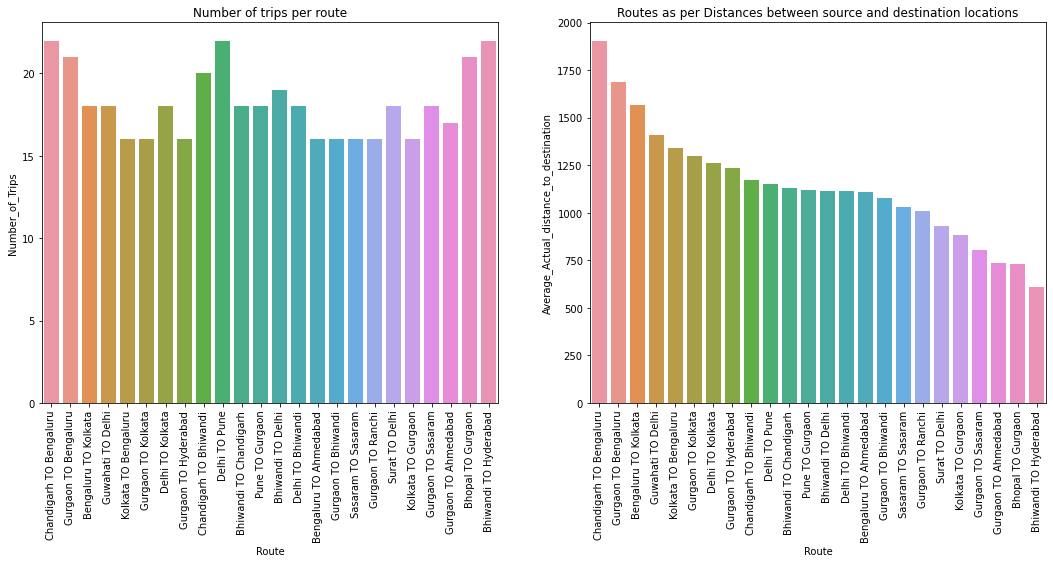

In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(121)
plt.title("Number of trips per route")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y = Busiest_and_Longest_Routes_top25["Number_of_Trips"])
plt.xticks(rotation = 90)
plt.subplot(122)
plt.title("Routes as per Distances between source and destination locations")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y= Busiest_and_Longest_Routes_top25["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

- Above charts showing the routes (souce and destinations locations with higest trips between locations) and having long distances.

In [ ]:
route_records.columns

Index(['SouceToDestination_city', 'ROUTE', '#source_cities',
       '#destination_cities', 'Number_of_Trips',
       'Average_Actual_distance_to_destination', '#source_states',
       '#destination_states', 'destination_states', 'source_states',
       'source_cities', 'route_type', 'destination_cities'],
      dtype='object')

### 10.1.3 Routes : passing through maxinum number of cities

In [ ]:
route_records[["SouceToDestination_city","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by=["#source_cities",
                                                       "#destination_cities",
                                                       "Number_of_Trips"]
                                                   ,ascending=False).head(25)

,SouceToDestination_city,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
0,Guwahati TO LakhimpurN,14.0,281.596486,13,11
2,Jaipur TO Tarnau,20.0,351.611796,10,10
1,Guwahati TO Tura,12.0,332.602225,10,10
3,Mangalore TO Udupi,9.0,195.257193,9,9
4,Ajmer TO Raipur,20.0,178.737233,9,8
5,Mainpuri TO Tilhar,12.0,207.247057,8,8
11,Hassan TO Koppa,21.0,200.497832,7,7
8,Shrirampur TO Sangamner,20.0,204.509529,7,7
9,Musiri TO Tiruchi,19.0,219.845121,7,7
14,Dausa TO Lalsot,17.0,232.408310,7,7


### 10.1.4 Top 20 Longest Route as per : average actual time taken from one city to another city

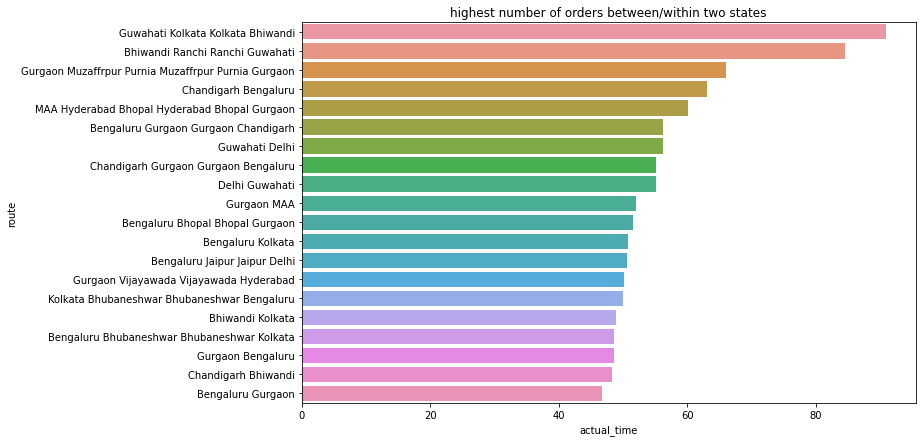

In [ ]:
Longest_route_as_per_actual_trip_time = trip_records.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(20).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,7))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],)
plt.title("highest number of orders between/within two states")
plt.show()

### 10.1.5 Highest number  of Trips happening between/within  two states : 

In [ ]:
highest_order_between_states = data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()


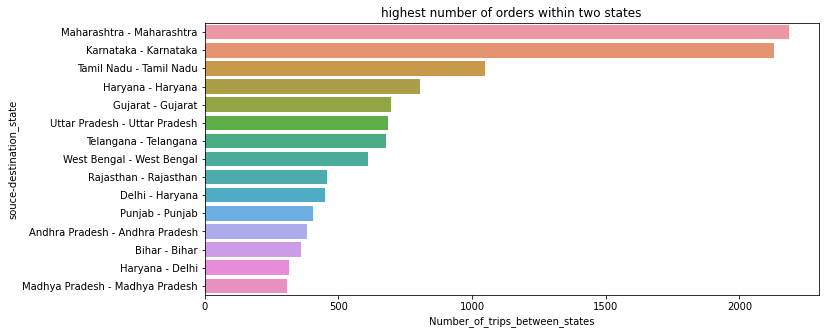

In [ ]:
HOBS  = highest_order_between_states.head(15)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

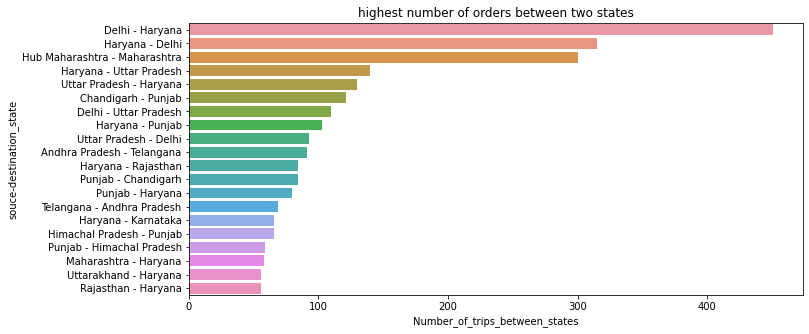

In [ ]:
HOBS = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS = HOBS[HOBS["source_state"]!=HOBS["destination_state"]].head(20)

HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders between two states")
plt.show()

- From above charts , 
        > Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh . 
        > Within the state , Maharashtra , Karnataka, Tamil Nadu are some states having above 1000 trips. 


### 10.1.6 Top 20 warehouses with heavy traffic : 

In [ ]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [ ]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)


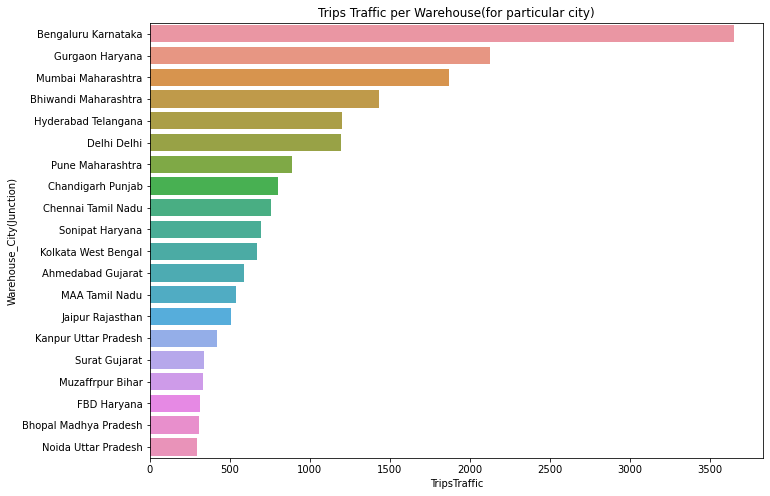

In [ ]:
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

- Top 20 Busiest Warehouse (junctions) as per trips traffic at the juction : are
 'Bengaluru Karnataka',
 'Gurgaon Haryana',
 'Mumbai Maharashtra',
 'Bhiwandi Maharashtra',
 'Hyderabad Telangana',
 'Delhi Delhi',
 'Pune Maharashtra',
 'Chandigarh Punjab',
 'Chennai Tamil Nadu',
 'Sonipat Haryana',
 'Kolkata West Bengal',
 'Ahmedabad Gujarat',
 'MAA Tamil Nadu',
 'Jaipur Rajasthan',
 'Kanpur Uttar Pradesh',
 'Surat Gujarat',
 'Muzaffrpur Bihar',
 'FBD Haryana',
 'Bhopal Madhya Pradesh',
 'Noida Uttar Pradesh'
        

In [ ]:
trip_records.groupby(["source_state","destination_state"])["trip_uuid"].count().sort_values(ascending=False).head(15).reset_index()

,source_state,destination_state,trip_uuid
0,Maharashtra,Maharashtra,2085
1,Karnataka,Karnataka,2002
2,Tamil Nadu,Tamil Nadu,996
3,Haryana,Haryana,771
4,Telangana,Telangana,627
5,Gujarat,Gujarat,624
6,West Bengal,West Bengal,610
7,Uttar Pradesh,Uttar Pradesh,529
8,Rajasthan,Rajasthan,400
9,Delhi,Haryana,385


# Inferences and Recommendations


## **Insights and Observations**

- 14817 different trips happened between source to destinations during 2018 , September and October.
- 1504 delivery routes on which trips are happening.
- we have 1508 unique source centers and 1481 unique destination centers
- From 14817 total different trips , we have  8908 (60%) of the trip-routes are Carting , which consists of small vehicles and 5909 (40%) of total trip-routes are FTL : which are Full Truck Load get to the destination sooner. as no other pickups or drop offs along the way .

**Hypothesis tests Results:**

From 2 sample t-test ,we can also conclude that 

    - Average time_taken_btwn_odstart_and_od_end for population is equal to Average start_scan_to_end_scan for population.
    - population average actual_time is less than population average start_scan_to_end_scan.
    - population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.
    - Mean of actual time is higher than Mean of the OSRM estimated time for delivery
    - Population average for Actual Time taken to complete delivery trip and segment actual time are same.
    - Average of OSRM Time & segment-osrm-time for population is not same   
    - Population Mean osrm time is less than Population Mean segment osrm time.
    - Average of OSRM distance for population is less than average of segment OSRM distance
    - population OSRM estimated distance is higher than the actual distance from source to destination warehouse.

**From Exploratory Data Analysis:**

- we can observe that Mumbai Maharashtra ,Delhi , Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana, Chennai Tamil Nadu, Ahmedabad-Gujarat, Pune Maharashtra, Chandigarh Chandigarh and Kolkata West Bengal are some cities have highest amount of trips happening states with in the city. 
- If we talk about , not having equal source and destination states , source and destination cities having highest number of trips in between are : Delhi TO Gurgao ,  Gurgaon  TO Bengaluru ,  Bhiwandi/Mumbai TO Pune Maharashtra ,    Sonipat TO    Gurgaon, Haryana
- It is also been observed that lots of deliveries are happening to airports  like : Chennai to MAA Chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to    CCU West Bengal Kolkata International Airport , Bengaluru to BLR-Bengaluru International Airport etc. 
- From Bar charts , and calculated tables in analysis , we can observe that highest trips are happening is with in the particular cities, in terms of average distance between destinations , we can observe Guwahati to Mumbai , Bangalore to Chandigarh ,Bangalore to Delhi , Benglore to Gurgaon are the longest routes.

- The source to destination city routes having largest numbers of trip happening having large distances :
    - Guwahati TO Bhiwandi, Bengaluru TO Chandigarh, Bengaluru TO Delhi, Gurgaon TO MAA Chennai Airport, Bhiwandi TO Kolkata, Bengaluru TO Kolkata, Gurgaon TO Hyderabad, Gurgaon TO Kolkata
- The routes which covered multiple cities in between source and destination :
    - Most covered cities routes are : Guwahati TO Lakhimpur , Jaipur TO Tanru , Guwahati TO Tura , Mangalore TO Udupi , Ajmer TO Raipur , Mainpuri TO Tilhar . which passes through  more than 8 cities.
- Routes which are busiest from source to destinations and states in which highest activities are noticed :
    - Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh . 
    - Within the state , Maharashtra , Karnataka, Tamil Nadu, Haryana, Telangana, Gujarat , West Bengal and Uttar Pradesh are some states having above 1000 trips. 
- Some warehouse having Maximum traffic and hence busiest junctions. 
    - Bengaluru Karnataka, Gurgaon Haryana, Mumbai Maharashtra, Hyderabad Telangana, Delhi, Pune Maharashtra, Chandigarh Punjab, Chennai Tamil Nadu, Sonipat Haryana, Kolkata West Bengal, Ahmedabad Gujarat, MAA Tamil Nadu, Jaipur Rajasthan, Kanpur Uttar Pradesh, Surat Gujarat, Muzaffrpur Bihar, FBD Haryana, Bhopal Madhya Pradesh, Noida Uttar Pradesh.

## **Recommendations**

- As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements. 
- Increasing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders. 
- We can work on  optimizing the scanning time on both ends which is start scanning time and end scanning time so that the delivery time can be equated to the OSRM estimated delivery time.
- For longer trips (both in terms of time and distance) FTL trips should be preferred.
- More trips should start between evening and early mornings.
- 'osrm distance' should be used as estimations of the actual trip distances.
- 'osrm time' should be used as estimations of the actual trip times.
- 'od_time_elapsed' should be used as estimations of start_scan_to_end_scan.